# Advanced Regression

#### Problem Statement:

A US-based housing company named Surprise Housing has  decided to enter the Australian market. 
The company uses data analytics to  purchase houses at a price below their actual values and flip them on at a  higher price. 
For the same purpose, the company has collected a data set  from the sale of houses in Australia.


Business Goal : 
    
    It is required to model the price of houses with the available independent variables. 
    This  model will then be used by the management to understand how exactly the prices vary with the variables.  
    They can accordingly manipulate the strategy of the firm and concentrate on areas that will yield high returns. 
    Further, the model will be a good way for management to understand the pricing dynamics of a new market.
    
    
Analytical Goal :
    
     A  regression model using regularization in order to predict the actual value of the prospective properties and decide 
     whether to invest in them or not Which variables are significant in predicting the price of a house, and How well those 
     variables describe the price of a house.
    


In [1]:
#Importing necessary Libraries
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt
import seaborn as sns

from sklearn.preprocessing import PolynomialFeatures, MinMaxScaler
from sklearn.model_selection import train_test_split
from sklearn.feature_selection import RFE

from sklearn.linear_model import LinearRegression, Ridge, Lasso
from sklearn.metrics import mean_squared_error, r2_score
from sklearn.model_selection import GridSearchCV

import warnings
warnings.filterwarnings('ignore')

# Loading the data and understand the variables

In [2]:
# Read the given CSV file

df = pd.read_csv('train.csv')
df.head()

,Id,MSSubClass,MSZoning,LotFrontage,LotArea,Street,Alley,LotShape,LandContour,Utilities,...,PoolArea,PoolQC,Fence,MiscFeature,MiscVal,MoSold,YrSold,SaleType,SaleCondition,SalePrice
0,1,60,RL,65.0,8450,Pave,NaN,Reg,Lvl,AllPub,...,0,NaN,NaN,NaN,0,2,2008,WD,Normal,208500
1,2,20,RL,80.0,9600,Pave,NaN,Reg,Lvl,AllPub,...,0,NaN,NaN,NaN,0,5,2007,WD,Normal,181500
2,3,60,RL,68.0,11250,Pave,NaN,IR1,Lvl,AllPub,...,0,NaN,NaN,NaN,0,9,2008,WD,Normal,223500
3,4,70,RL,60.0,9550,Pave,NaN,IR1,Lvl,AllPub,...,0,NaN,NaN,NaN,0,2,2006,WD,Abnorml,140000
4,5,60,RL,84.0,14260,Pave,NaN,IR1,Lvl,AllPub,...,0,NaN,NaN,NaN,0,12,2008,WD,Normal,250000


In [79]:
df.shape

(1460, 81)

In [80]:
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 1460 entries, 0 to 1459
Data columns (total 81 columns):
 #   Column         Non-Null Count  Dtype  
---  ------         --------------  -----  
 0   Id             1460 non-null   int64  
 1   MSSubClass     1460 non-null   int64  
 2   MSZoning       1460 non-null   object 
 3   LotFrontage    1201 non-null   float64
 4   LotArea        1460 non-null   int64  
 5   Street         1460 non-null   object 
 6   Alley          91 non-null     object 
 7   LotShape       1460 non-null   object 
 8   LandContour    1460 non-null   object 
 9   Utilities      1460 non-null   object 
 10  LotConfig      1460 non-null   object 
 11  LandSlope      1460 non-null   object 
 12  Neighborhood   1460 non-null   object 
 13  Condition1     1460 non-null   object 
 14  Condition2     1460 non-null   object 
 15  BldgType       1460 non-null   object 
 16  HouseStyle     1460 non-null   object 
 17  OverallQual    1460 non-null   int64  
 18  OverallC

In [76]:
df.describe()

,Id,MSSubClass,LotFrontage,LotArea,OverallQual,OverallCond,YearBuilt,YearRemodAdd,MasVnrArea,BsmtFinSF1,...,WoodDeckSF,OpenPorchSF,EnclosedPorch,3SsnPorch,ScreenPorch,PoolArea,MiscVal,MoSold,YrSold,SalePrice
count,1460.000000,1460.000000,1201.000000,1460.000000,1460.000000,1460.000000,1460.000000,1460.000000,1452.000000,1460.000000,...,1460.000000,1460.000000,1460.000000,1460.000000,1460.000000,1460.000000,1460.000000,1460.000000,1460.000000,1460.000000
mean,730.500000,56.897260,70.049958,10516.828082,6.099315,5.575342,1971.267808,1984.865753,103.685262,443.639726,...,94.244521,46.660274,21.954110,3.409589,15.060959,2.758904,43.489041,6.321918,2007.815753,180921.195890
std,421.610009,42.300571,24.284752,9981.264932,1.382997,1.112799,30.202904,20.645407,181.066207,456.098091,...,125.338794,66.256028,61.119149,29.317331,55.757415,40.177307,496.123024,2.703626,1.328095,79442.502883
min,1.000000,20.000000,21.000000,1300.000000,1.000000,1.000000,1872.000000,1950.000000,0.000000,0.000000,...,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,1.000000,2006.000000,34900.000000
25%,365.750000,20.000000,59.000000,7553.500000,5.000000,5.000000,1954.000000,1967.000000,0.000000,0.000000,...,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,5.000000,2007.000000,129975.000000
50%,730.500000,50.000000,69.000000,9478.500000,6.000000,5.000000,1973.000000,1994.000000,0.000000,383.500000,...,0.000000,25.000000,0.000000,0.000000,0.000000,0.000000,0.000000,6.000000,2008.000000,163000.000000
75%,1095.250000,70.000000,80.000000,11601.500000,7.000000,6.000000,2000.000000,2004.000000,166.000000,712.250000,...,168.000000,68.000000,0.000000,0.000000,0.000000,0.000000,0.000000,8.000000,2009.000000,214000.000000
max,1460.000000,190.000000,313.000000,215245.000000,10.000000,9.000000,2010.000000,2010.000000,1600.000000,5644.000000,...,857.000000,547.000000,552.000000,508.000000,480.000000,738.000000,15500.000000,12.000000,2010.000000,755000.000000


In [77]:
df.nunique().sort_values(ascending=False).head()

Id           1460
LotArea      1073
GrLivArea     861
BsmtUnfSF     780
1stFlrSF      753
dtype: int64

In [3]:
#As Id column is the index which is a unique identifier.It will not impact our analysis , so drop it.
df = df.drop(['Id'],axis='columns')

# Checking and imputation of missing Values

In [79]:
# Checking the missing values
round(df.isnull().sum()/len(df.index),2).sort_values(ascending=False)

PoolQC         1.00
MiscFeature    0.96
Alley          0.94
Fence          0.81
FireplaceQu    0.47
               ... 
ExterCond      0.00
ExterQual      0.00
Exterior2nd    0.00
Exterior1st    0.00
SalePrice      0.00
Length: 80, dtype: float64

In [47]:
# Considering 45% of missing values as my threshold and dropping the column having more then the threshold
round(df.isnull().sum()/len(df.index),2)[round(df.isnull().sum()/
                                                                 len(df.index),2).values>0.45].sort_values(ascending=False).head(18)


PoolQC         1.00
MiscFeature    0.96
Alley          0.94
Fence          0.81
FireplaceQu    0.47
dtype: float64

In [4]:
# dropping the columns having more then 0.45 threshold as it will not impact our analysis
df = df.drop(['Alley','FireplaceQu','PoolQC','Fence','MiscFeature'],axis='columns')

In [417]:
# check for null values in all categorical columns

df.select_dtypes(include='object').isnull().sum()[df.select_dtypes(include='object').isnull().sum()>0]

MasVnrType       8
BsmtQual        37
BsmtCond        37
BsmtExposure    38
BsmtFinType1    37
BsmtFinType2    38
Electrical       1
GarageType      81
GarageFinish    81
GarageQual      81
GarageCond      81
dtype: int64

In [418]:
# check for null values in all numerical columns
df.select_dtypes(exclude='object').isnull().sum()[df.select_dtypes(exclude='object').isnull().sum()>0]

LotFrontage    259
MasVnrArea       8
GarageYrBlt     81
dtype: int64

In [5]:
# for the "below categorical columns" we will impute the null values with 'None'
for col in ('GarageCond', 'GarageType', 'GarageFinish','GarageQual','MasVnrType','BsmtQual','BsmtCond','BsmtExposure',
            'BsmtFinType1','BsmtFinType2','Electrical'):
    
     df[col] = df[col].fillna('None')
    


In [6]:
# for the "below numerical columns" we will impute the null values with 'median'
for col in ('MasVnrArea', 'GarageYrBlt', 'LotFrontage'):
    
    df[col] = df[col].fillna(df[col].median())

In [73]:
# checking for the presence of any more null values
df.isnull().values.any()

False

In [7]:
# Selecting categorical columns
col=df.select_dtypes(include='object').columns
print(col)

Index(['MSZoning', 'Street', 'LotShape', 'LandContour', 'Utilities',
       'LotConfig', 'LandSlope', 'Neighborhood', 'Condition1', 'Condition2',
       'BldgType', 'HouseStyle', 'RoofStyle', 'RoofMatl', 'Exterior1st',
       'Exterior2nd', 'MasVnrType', 'ExterQual', 'ExterCond', 'Foundation',
       'BsmtQual', 'BsmtCond', 'BsmtExposure', 'BsmtFinType1', 'BsmtFinType2',
       'Heating', 'HeatingQC', 'CentralAir', 'Electrical', 'KitchenQual',
       'Functional', 'GarageType', 'GarageFinish', 'GarageQual', 'GarageCond',
       'PavedDrive', 'SaleType', 'SaleCondition'],
      dtype='object')


In [8]:
#Dropping of categorical variables which have more value counts as it will not impact more to our analysis.

def ValueCounts():
    column = []
    columns = df.select_dtypes(include=['object'])
    for col in (columns):
        if(df[col].value_counts().max() >= 1200):
            column.append(col)
    return column

removedColumn = ValueCounts()

print(removedColumn)

df.drop(removedColumn, axis = 1, inplace = True)

df.head()
df.shape

['Street', 'LandContour', 'Utilities', 'LandSlope', 'Condition1', 'Condition2', 'BldgType', 'RoofMatl', 'ExterCond', 'BsmtCond', 'BsmtFinType2', 'Heating', 'CentralAir', 'Electrical', 'Functional', 'GarageQual', 'GarageCond', 'PavedDrive', 'SaleType']


(1460, 56)

In [9]:
# Selecting numerical columns
co=df.select_dtypes(exclude='object').columns
print(co)

Index(['MSSubClass', 'LotFrontage', 'LotArea', 'OverallQual', 'OverallCond',
       'YearBuilt', 'YearRemodAdd', 'MasVnrArea', 'BsmtFinSF1', 'BsmtFinSF2',
       'BsmtUnfSF', 'TotalBsmtSF', '1stFlrSF', '2ndFlrSF', 'LowQualFinSF',
       'GrLivArea', 'BsmtFullBath', 'BsmtHalfBath', 'FullBath', 'HalfBath',
       'BedroomAbvGr', 'KitchenAbvGr', 'TotRmsAbvGrd', 'Fireplaces',
       'GarageYrBlt', 'GarageCars', 'GarageArea', 'WoodDeckSF', 'OpenPorchSF',
       'EnclosedPorch', '3SsnPorch', 'ScreenPorch', 'PoolArea', 'MiscVal',
       'MoSold', 'YrSold', 'SalePrice'],
      dtype='object')


In [10]:
#Dropping of numerical variables which have more value counts as it will not impact more to our analysis.
def ValueCounts():
    column = []
    columns = df.select_dtypes(exclude=['object'])
    for col in (columns):
        if(df[col].value_counts().max() >= 1200):
            column.append(col)
    return column

removedColumn = ValueCounts()

print(removedColumn)

df.drop(removedColumn, axis = 1, inplace = True)


df.shape

['BsmtFinSF2', 'LowQualFinSF', 'BsmtHalfBath', 'KitchenAbvGr', 'EnclosedPorch', '3SsnPorch', 'ScreenPorch', 'PoolArea', 'MiscVal']


(1460, 47)

In [90]:
df.head()

,MSSubClass,MSZoning,LotFrontage,LotArea,LotShape,LotConfig,Neighborhood,HouseStyle,OverallQual,OverallCond,...,GarageYrBlt,GarageFinish,GarageCars,GarageArea,WoodDeckSF,OpenPorchSF,MoSold,YrSold,SaleCondition,SalePrice
0,60,RL,65.0,8450,Reg,Inside,CollgCr,2Story,7,5,...,2003.0,RFn,2,548,0,61,2,2008,Normal,208500
1,20,RL,80.0,9600,Reg,FR2,Veenker,1Story,6,8,...,1976.0,RFn,2,460,298,0,5,2007,Normal,181500
2,60,RL,68.0,11250,IR1,Inside,CollgCr,2Story,7,5,...,2001.0,RFn,2,608,0,42,9,2008,Normal,223500
3,70,RL,60.0,9550,IR1,Corner,Crawfor,2Story,7,5,...,1998.0,Unf,3,642,0,35,2,2006,Abnorml,140000
4,60,RL,84.0,14260,IR1,FR2,NoRidge,2Story,8,5,...,2000.0,RFn,3,836,192,84,12,2008,Normal,250000


In [425]:
# Check if there are any duplicate values in the dataset

df[df.duplicated(keep=False)]

,MSSubClass,MSZoning,LotFrontage,LotArea,LotShape,LotConfig,Neighborhood,HouseStyle,OverallQual,OverallCond,...,GarageYrBlt,GarageFinish,GarageCars,GarageArea,WoodDeckSF,OpenPorchSF,MoSold,YrSold,SaleCondition,SalePrice


Duplicate values are not present

#### Outlier Treatment

In [51]:
df.describe(percentiles=[.25, .5, .75, .90, .95, .99])


,MSSubClass,LotFrontage,LotArea,OverallQual,OverallCond,YearBuilt,YearRemodAdd,MasVnrArea,BsmtFinSF1,BsmtUnfSF,...,TotRmsAbvGrd,Fireplaces,GarageYrBlt,GarageCars,GarageArea,WoodDeckSF,OpenPorchSF,MoSold,YrSold,SalePrice
count,1460.000000,1460.000000,1460.000000,1460.000000,1460.000000,1460.000000,1460.000000,1460.000000,1460.000000,1460.000000,...,1460.000000,1460.000000,1460.000000,1460.000000,1460.000000,1460.000000,1460.000000,1460.000000,1460.000000,1460.000000
mean,56.897260,69.863699,10516.828082,6.099315,5.575342,1971.267808,1984.865753,103.117123,443.639726,567.240411,...,6.517808,0.613014,1978.589041,1.767123,472.980137,94.244521,46.660274,6.321918,2007.815753,180921.195890
std,42.300571,22.027677,9981.264932,1.382997,1.112799,30.202904,20.645407,180.731373,456.098091,441.866955,...,1.625393,0.644666,23.997022,0.747315,213.804841,125.338794,66.256028,2.703626,1.328095,79442.502883
min,20.000000,21.000000,1300.000000,1.000000,1.000000,1872.000000,1950.000000,0.000000,0.000000,0.000000,...,2.000000,0.000000,1900.000000,0.000000,0.000000,0.000000,0.000000,1.000000,2006.000000,34900.000000
25%,20.000000,60.000000,7553.500000,5.000000,5.000000,1954.000000,1967.000000,0.000000,0.000000,223.000000,...,5.000000,0.000000,1962.000000,1.000000,334.500000,0.000000,0.000000,5.000000,2007.000000,129975.000000
50%,50.000000,69.000000,9478.500000,6.000000,5.000000,1973.000000,1994.000000,0.000000,383.500000,477.500000,...,6.000000,1.000000,1980.000000,2.000000,480.000000,0.000000,25.000000,6.000000,2008.000000,163000.000000
75%,70.000000,79.000000,11601.500000,7.000000,6.000000,2000.000000,2004.000000,164.250000,712.250000,808.000000,...,7.000000,1.000000,2001.000000,2.000000,576.000000,168.000000,68.000000,8.000000,2009.000000,214000.000000
90%,120.000000,92.000000,14381.700000,8.000000,7.000000,2006.000000,2006.000000,335.000000,1065.500000,1232.000000,...,9.000000,1.000000,2006.000000,3.000000,757.100000,262.000000,130.000000,10.000000,2010.000000,278000.000000
95%,160.000000,104.000000,17401.150000,8.000000,8.000000,2007.000000,2007.000000,456.000000,1274.000000,1468.000000,...,10.000000,2.000000,2007.000000,3.000000,850.100000,335.000000,175.050000,11.000000,2010.000000,326100.000000
99%,190.000000,137.410000,37567.640000,10.000000,9.000000,2009.000000,2009.000000,791.280000,1572.410000,1797.050000,...,11.000000,2.000000,2009.000000,3.000000,1002.790000,505.460000,285.820000,12.000000,2010.000000,442567.010000


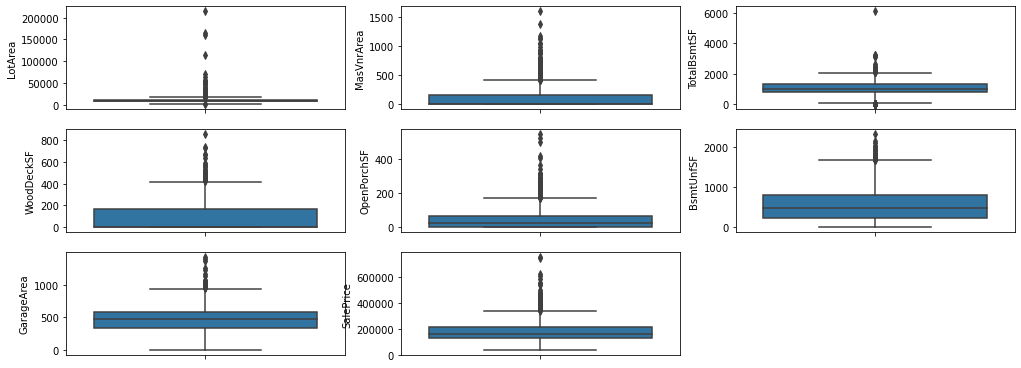

In [426]:
# Check the outliers by plotting boxplot for some  numeric columns

plt.figure(figsize=(17, 20))
plt.subplot(9,3,1)
sns.boxplot(y = 'LotArea', data = df)
plt.subplot(9,3,2)
sns.boxplot(y = 'MasVnrArea' , data = df)
plt.subplot(9,3,3)
sns.boxplot(y = 'TotalBsmtSF', data = df)
plt.subplot(9,3,4)
sns.boxplot(y = 'WoodDeckSF', data = df)
plt.subplot(9,3,5)
sns.boxplot(y = 'OpenPorchSF', data = df)
plt.subplot(9,3,6)
sns.boxplot(y = 'BsmtUnfSF', data = df)
plt.subplot(9,3,7)
sns.boxplot(y = 'GarageArea', data = df)
plt.subplot(9,3,8)
sns.boxplot(y = 'SalePrice', data = df)

plt.show()

From the above box plot some variables contain outliers.

In [11]:
#IQR to handle outliers
# Selecting numerical columns
cols=df.select_dtypes(exclude='object').columns
#print(co)

Q1 = df[cols].quantile(0.05)
Q3 = df[cols].quantile(0.95)
IQR = Q3 - Q1

df = df[~((df[cols] < (Q1 - 1.5 * IQR)) |(df[cols] > (Q3 + 1.5 * IQR))).any(axis=1)]

In [429]:
df.describe(percentiles=[.25, .5, .75, .90, .95, .99])

,MSSubClass,LotFrontage,LotArea,OverallQual,OverallCond,YearBuilt,YearRemodAdd,MasVnrArea,BsmtFinSF1,BsmtUnfSF,...,TotRmsAbvGrd,Fireplaces,GarageYrBlt,GarageCars,GarageArea,WoodDeckSF,OpenPorchSF,MoSold,YrSold,SalePrice
count,1435.000000,1435.000000,1435.000000,1435.000000,1435.000000,1435.000000,1435.000000,1435.000000,1435.000000,1435.000000,...,1435.000000,1435.000000,1435.000000,1435.000000,1435.000000,1435.000000,1435.000000,1435.000000,1435.000000,1435.000000
mean,56.895470,69.366551,9732.187456,6.080139,5.570035,1971.353310,1984.785366,99.575610,431.380488,568.887805,...,6.489895,0.598606,1978.640418,1.762369,470.887108,91.917770,45.113589,6.318467,2007.816725,178588.045993
std,42.267861,19.872768,4154.438952,1.363446,1.111532,30.148839,20.671096,168.928927,426.475459,442.576069,...,1.589848,0.633115,23.989253,0.744092,211.142495,121.349445,61.709246,2.698915,1.331623,74649.649069
min,20.000000,21.000000,1300.000000,1.000000,1.000000,1872.000000,1950.000000,0.000000,0.000000,0.000000,...,2.000000,0.000000,1900.000000,0.000000,0.000000,0.000000,0.000000,1.000000,2006.000000,35311.000000
25%,20.000000,60.000000,7500.000000,5.000000,5.000000,1954.000000,1966.500000,0.000000,0.000000,224.000000,...,5.000000,0.000000,1962.000000,1.000000,326.500000,0.000000,0.000000,5.000000,2007.000000,129500.000000
50%,50.000000,69.000000,9400.000000,6.000000,5.000000,1973.000000,1993.000000,0.000000,378.000000,481.000000,...,6.000000,1.000000,1980.000000,2.000000,478.000000,0.000000,24.000000,6.000000,2008.000000,161750.000000
75%,70.000000,79.000000,11450.000000,7.000000,6.000000,2001.000000,2004.000000,162.500000,701.000000,808.000000,...,7.000000,1.000000,2001.000000,2.000000,576.000000,168.000000,66.000000,8.000000,2009.000000,211500.000000
90%,120.000000,92.000000,14113.800000,8.000000,7.000000,2006.000000,2006.000000,320.000000,1040.000000,1233.200000,...,8.000000,1.000000,2006.000000,3.000000,750.000000,256.000000,129.600000,10.000000,2010.000000,275000.000000
95%,160.000000,102.000000,16473.800000,8.000000,8.000000,2007.000000,2007.000000,442.000000,1247.600000,1468.600000,...,9.000000,2.000000,2007.000000,3.000000,843.300000,324.300000,170.000000,11.000000,2010.000000,324300.000000
99%,190.000000,130.000000,24891.880000,9.000000,9.000000,2009.000000,2009.000000,763.960000,1532.520000,1798.300000,...,11.000000,2.000000,2009.000000,3.000000,990.920000,482.600000,264.320000,12.000000,2010.000000,428640.000000


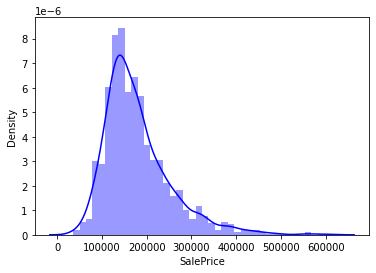

In [308]:
# Sale columns
plt.figure()
sns.distplot(df['SalePrice'],color='b')
plt.show()


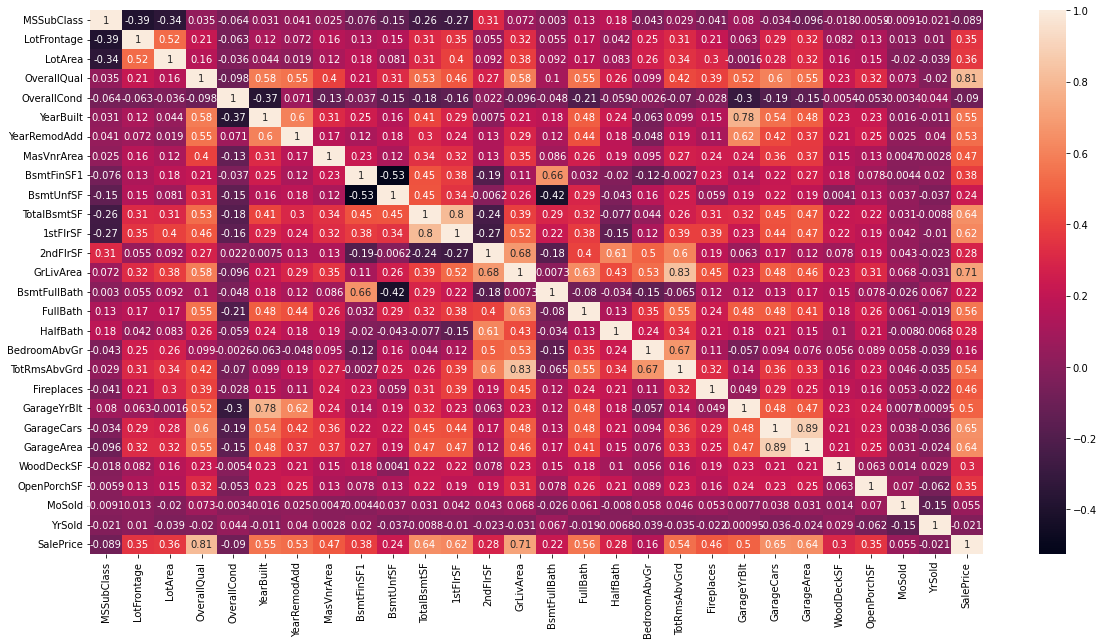

In [430]:
# Check the correlation of numerical columns

plt.figure(figsize = (20, 10))
sns.heatmap(df.corr(), annot = True)
plt.show()

Removing the column which shows high correlation

BsmtFinSF1 and BsmtUnfSF shows -53 %

In [12]:
#Removing the highly correlated variable

df.drop(['BsmtFinSF1'], axis = 1, inplace = True)

In [13]:

# Create a new column named houseAge and determine the age of the building at the time of selling

def houseAge(row):
    if(row['YearBuilt'] == row['YearRemodAdd']):
        return row['YrSold'] - row['YearBuilt']
    else:
        return row['YrSold'] - row['YearRemodAdd']
       
df['houseAge'] = df.apply(houseAge, axis=1)
df.head()  

,MSSubClass,MSZoning,LotFrontage,LotArea,LotShape,LotConfig,Neighborhood,HouseStyle,OverallQual,OverallCond,...,GarageFinish,GarageCars,GarageArea,WoodDeckSF,OpenPorchSF,MoSold,YrSold,SaleCondition,SalePrice,houseAge
0,60,RL,65.0,8450,Reg,Inside,CollgCr,2Story,7,5,...,RFn,2,548,0,61,2,2008,Normal,208500,5
1,20,RL,80.0,9600,Reg,FR2,Veenker,1Story,6,8,...,RFn,2,460,298,0,5,2007,Normal,181500,31
2,60,RL,68.0,11250,IR1,Inside,CollgCr,2Story,7,5,...,RFn,2,608,0,42,9,2008,Normal,223500,6
3,70,RL,60.0,9550,IR1,Corner,Crawfor,2Story,7,5,...,Unf,3,642,0,35,2,2006,Abnorml,140000,36
4,60,RL,84.0,14260,IR1,FR2,NoRidge,2Story,8,5,...,RFn,3,836,192,84,12,2008,Normal,250000,8


In [14]:
# Since we have created new features from YearBuilt, YearRemodAdd, YrSold , we can drop these columns as we 
# would only be using the derived column for further analysis
# As 'GarageYrBlt','MoSold' will also a year and month column which will not impact our analysis.

df.drop(['YearBuilt', 'YearRemodAdd', 'YrSold', 'GarageYrBlt','MoSold'], axis = 1, inplace = True)

In [435]:
df.shape

(1435, 42)

# Exploratory Data Analysis


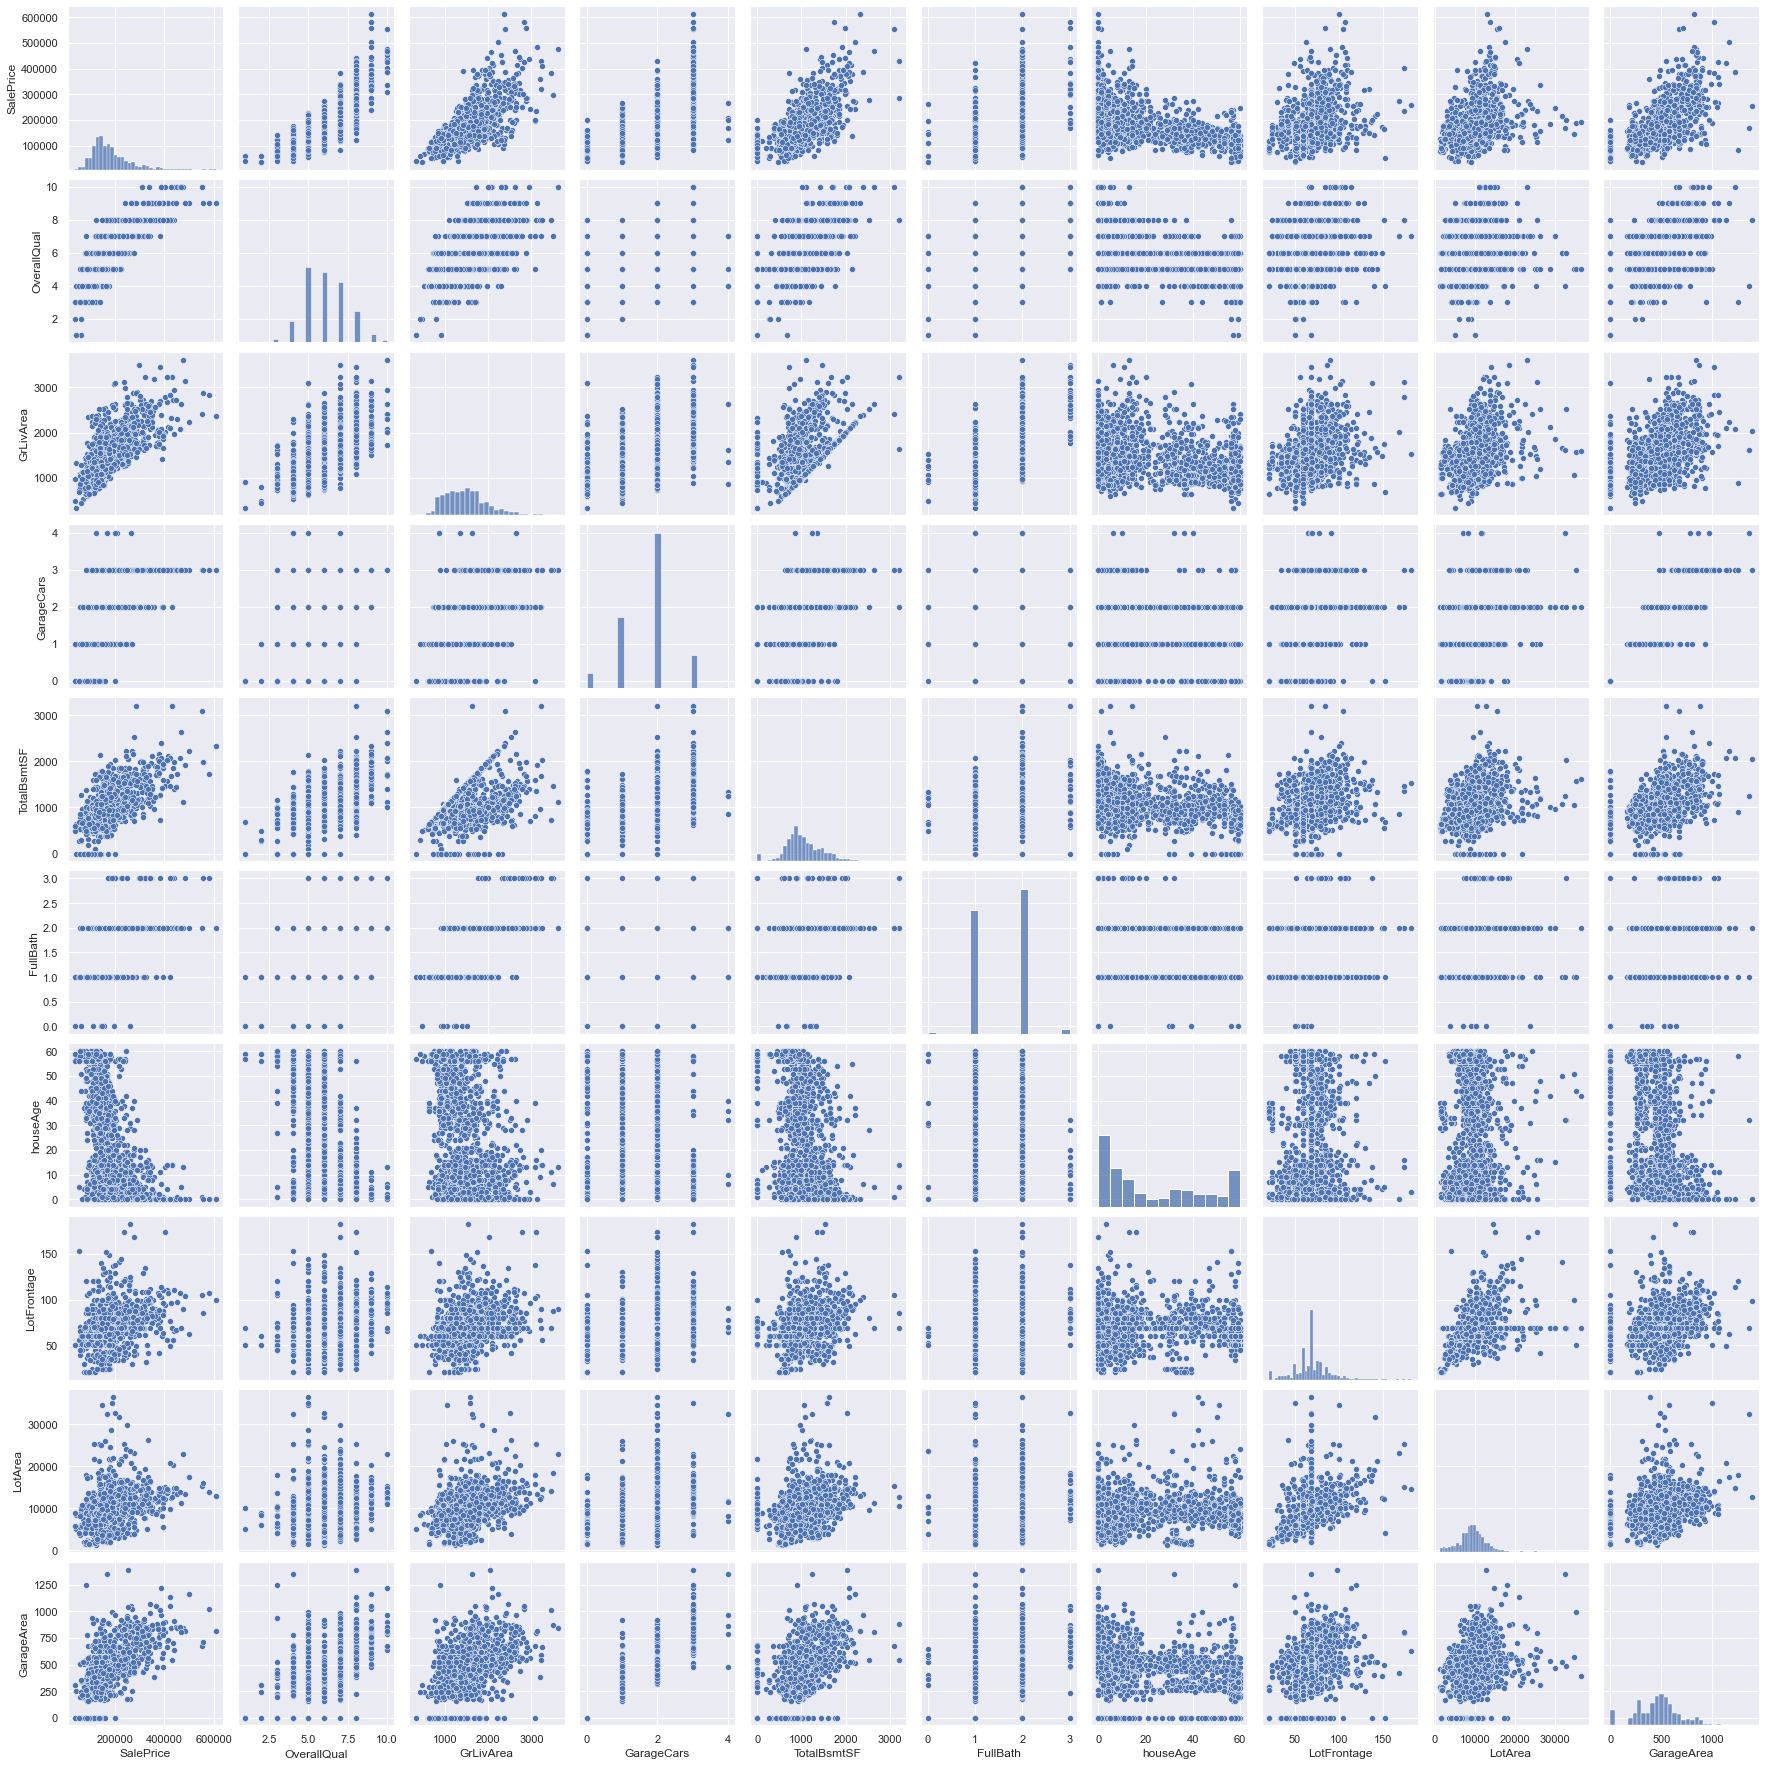

In [436]:
sns.set()
cols = ['SalePrice', 'OverallQual', 'GrLivArea', 'GarageCars', 'TotalBsmtSF', 'FullBath', 'houseAge','LotFrontage','LotArea','GarageArea']
sns.pairplot(df[cols], size = 2.5)
plt.show();

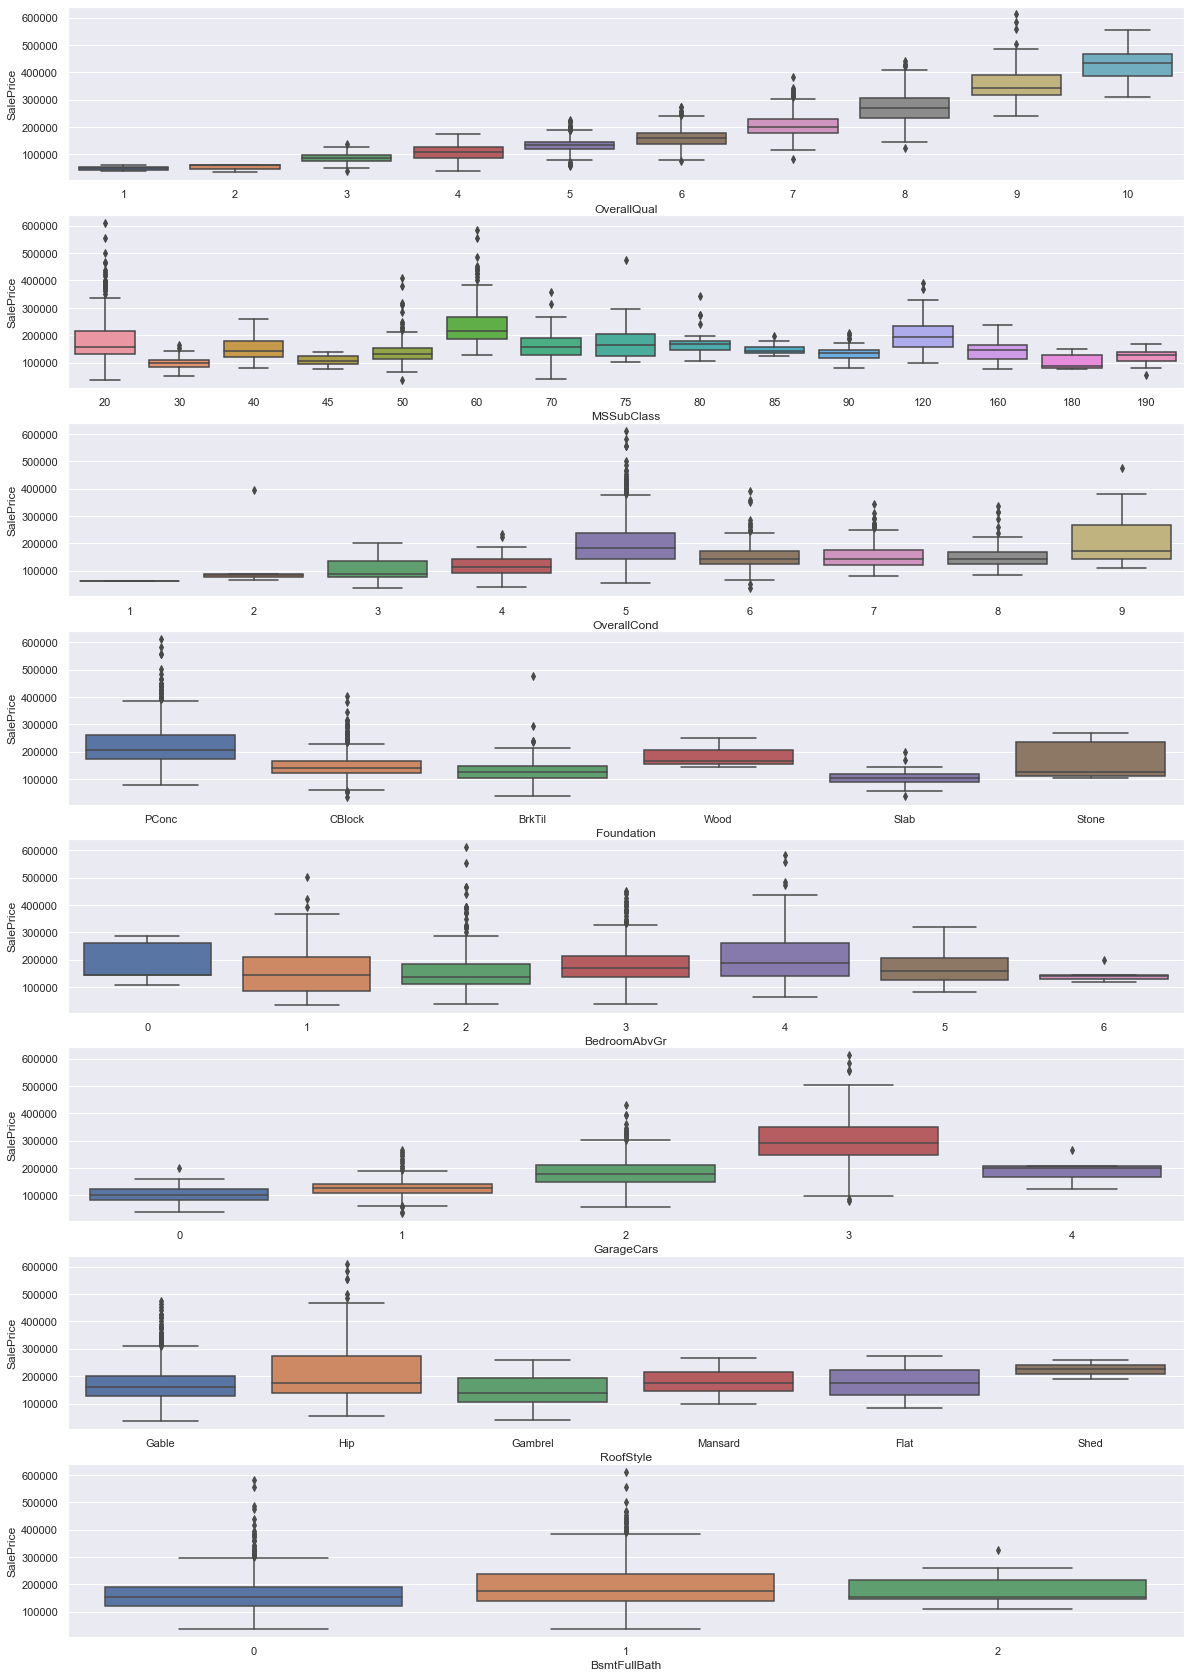

In [444]:
#Plotting boxplot of some of the varables against the target variable

plt.figure(figsize=(20, 30))

plt.subplot(8,1,1)
sns.boxplot(x = 'OverallQual', y = 'SalePrice', data = df)

plt.subplot(8,1,2)
sns.boxplot(x = 'MSSubClass', y = 'SalePrice', data = df)


plt.subplot(8,1,3)
sns.boxplot(x = 'OverallCond', y = 'SalePrice', data = df)

plt.subplot(8,1,4)
sns.boxplot(x = 'Foundation', y = 'SalePrice', data = df)


plt.subplot(8,1,5)
sns.boxplot(x = 'BedroomAbvGr', y = 'SalePrice', data = df)

plt.subplot(8,1,6)
sns.boxplot(x = 'GarageCars', y = 'SalePrice', data = df)

plt.subplot(8,1,7)
sns.boxplot(x = 'RoofStyle', y = 'SalePrice', data = df)


plt.subplot(8,1,8)
sns.boxplot(x = 'BsmtFullBath', y = 'SalePrice', data = df)




plt.show()

##### From the above box plot we observe that,
As the OverallQality increases SalePrice also increases. 

SalePrice increases in MSSubClass 60 and very low at 30.

SalePrice is higher when OverallCond is at 5 and very low at 1.

If the foundation is Pconc than the sale price is more.

If the BedroomAbvgr is at 4 than higher the saleprice.

SalePrice is higher for GarageCars at 3.

For RoofStyle Hip type the SalePrice is high.

SalePrice is high for BsmtFullBath.



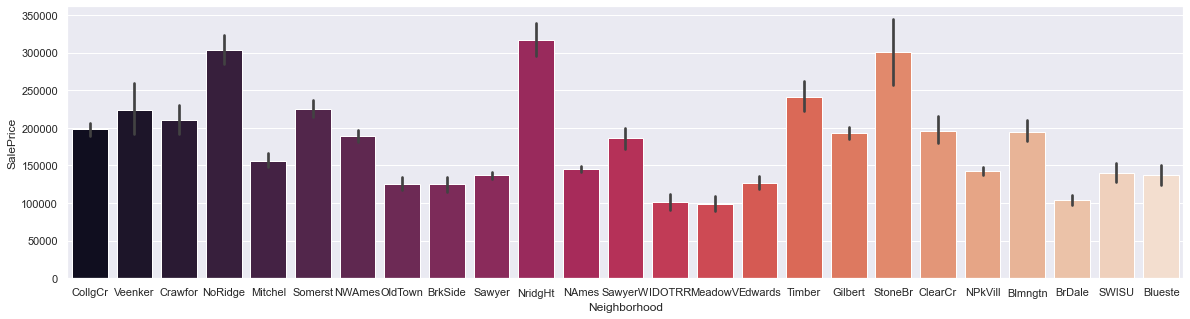

In [454]:
plt.figure(figsize=(20,5))
sns.barplot('Neighborhood','SalePrice',data=df,palette="rocket")
plt.show()

From the above barplot SalePrice is higher at Nridght and lower atMeadowV

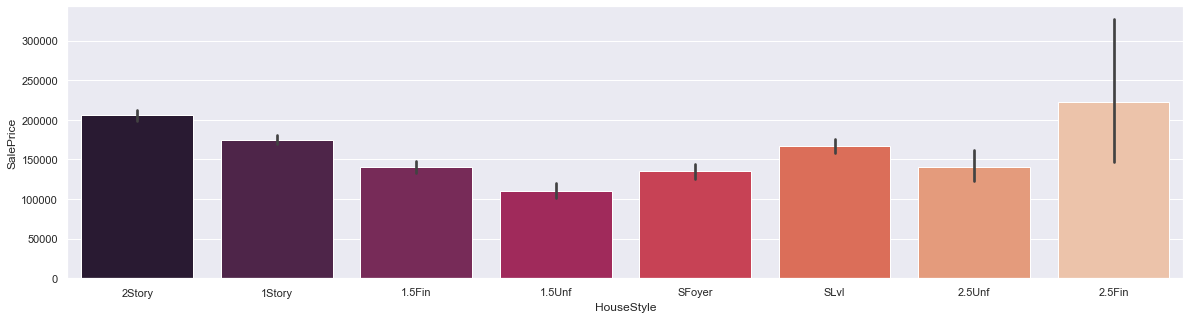

In [456]:
plt.figure(figsize=(20,5))
sns.barplot('HouseStyle','SalePrice',data=df,palette="rocket")
plt.show()

HouseStyle 2.5Fin having higher SalePrice

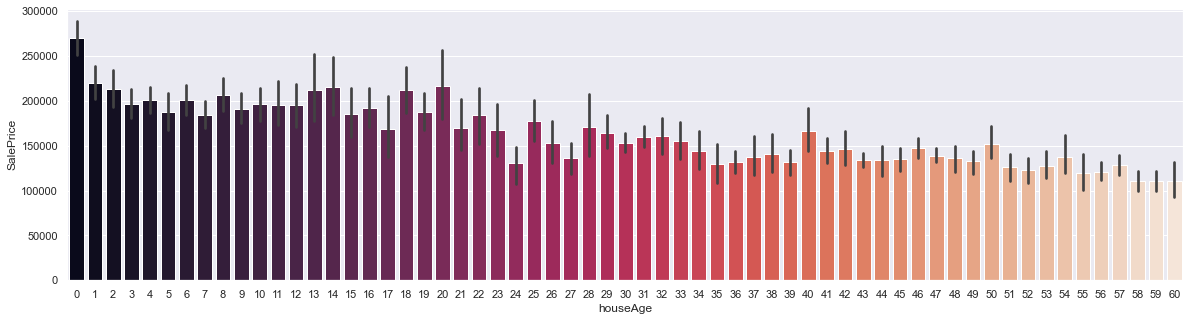

In [458]:
plt.figure(figsize=(20,5))
sns.barplot('houseAge','SalePrice',data=df,palette="rocket")
plt.show()

Newer the house More is the SalePrice,at houseAge 0 having the higher price.

In [15]:
# Some of the variables are ordered categorical and some are unordered categorical
# For values which can be ordered, we have given an ordered sequence value
# For values which cannot be ordered, we have categorised them into 0 and 1

df['lotShape'] = df['LotShape'].map({'Reg': 3, 'IR1': 2, 'IR2': 1, 'IR3': 0})
df['exterQual'] = df['ExterQual'].map({'Ex': 5, 'Gd': 4, 'TA': 3, 'Fa': 2, 'Po': 1, 'None': 0 })
df['bsmtQual'] = df['BsmtQual'].map({'Ex': 5, 'Gd': 4, 'TA': 3, 'Fa': 2, 'Po': 1, 'None': 0})
df['bsmtExposure'] = df['BsmtExposure'].map({'Gd': 4, 'Av': 3, 'Mn': 2, 'No': 1, 'None': 0})
df['bsmtFinType1'] = df['BsmtFinType1'].map({'GLQ': 6, 'ALQ': 5, 'BLQ': 4, 'Rec': 3, 'LwQ': 2, 'Unf': 1, 
                                                                 'None': 0})
df['heatingQC'] = df['HeatingQC'].map({'Ex': 5, 'Gd': 4, 'TA': 3, 'Fa': 2, 'Po': 1, 'None': 0})
df['kitchenQual'] = df['KitchenQual'].map({'Ex': 5, 'Gd': 4, 'TA': 3, 'Fa': 2, 'Po': 1, 'None': 0})

df['garageFinish'] = df['GarageFinish'].map({'Fin': 3, 'RFn': 2, 'Unf': 1, 'None': 0 })

df['houseStyle'] = df['HouseStyle'].map({'SLvl': 8, 'SFoyer': 7, '2.5Fin': 6, '2.5Unf': 5, '2Story': 4, 
                                                                 '1.5Fin': 3, '1.5Unf': 2, '1Story': 1, 'None': 0 })

df['lotConfig'] = df['LotConfig'].map({'Inside': 5, 'Corner': 4, 'CulDSac': 3, 'FR2': 2, 'FR3': 1, 
                                                           'None': 0  })
df['masVnrType'] = df['MasVnrType'].map({'BrkCmn': 1, 'BrkFace': 1, 'CBlock': 1, 'Stone': 1, 'None': 0 })
df['saleCondition'] = df['SaleCondition'].map({'Normal': 1, 'Partial': 1, 'Abnorml': 0, 'Family': 0, 
                                                                   'Alloca': 0, 'AdjLand': 0, 'None': 0})
df.head()

,MSSubClass,MSZoning,LotFrontage,LotArea,LotShape,LotConfig,Neighborhood,HouseStyle,OverallQual,OverallCond,...,bsmtQual,bsmtExposure,bsmtFinType1,heatingQC,kitchenQual,garageFinish,houseStyle,lotConfig,masVnrType,saleCondition
0,60,RL,65.0,8450,Reg,Inside,CollgCr,2Story,7,5,...,4,1,6,5,4,2,4,5,1,1
1,20,RL,80.0,9600,Reg,FR2,Veenker,1Story,6,8,...,4,4,5,5,3,2,1,2,0,1
2,60,RL,68.0,11250,IR1,Inside,CollgCr,2Story,7,5,...,4,2,6,5,4,2,4,5,1,1
3,70,RL,60.0,9550,IR1,Corner,Crawfor,2Story,7,5,...,3,1,5,4,4,1,4,4,0,0
4,60,RL,84.0,14260,IR1,FR2,NoRidge,2Story,8,5,...,4,3,6,5,4,2,4,2,1,1


In [16]:
#Drop the original columns after mapping
df=df.drop(['LotShape', 'ExterQual', 'BsmtQual', 'BsmtExposure', 'BsmtFinType1', 'HeatingQC', 
                                'KitchenQual','GarageFinish','HouseStyle', 
                                'LotConfig', 'MasVnrType', 'SaleCondition'], axis=1)

In [17]:
df.columns

Index(['MSSubClass', 'MSZoning', 'LotFrontage', 'LotArea', 'Neighborhood',
       'OverallQual', 'OverallCond', 'RoofStyle', 'Exterior1st', 'Exterior2nd',
       'MasVnrArea', 'Foundation', 'BsmtUnfSF', 'TotalBsmtSF', '1stFlrSF',
       '2ndFlrSF', 'GrLivArea', 'BsmtFullBath', 'FullBath', 'HalfBath',
       'BedroomAbvGr', 'TotRmsAbvGrd', 'Fireplaces', 'GarageType',
       'GarageCars', 'GarageArea', 'WoodDeckSF', 'OpenPorchSF', 'SalePrice',
       'houseAge', 'lotShape', 'exterQual', 'bsmtQual', 'bsmtExposure',
       'bsmtFinType1', 'heatingQC', 'kitchenQual', 'garageFinish',
       'houseStyle', 'lotConfig', 'masVnrType', 'saleCondition'],
      dtype='object')

In [18]:
#Select the categorical colums from the dataset
cat_values = df.select_dtypes(include=['object'])
cat_values.head()

,MSZoning,Neighborhood,RoofStyle,Exterior1st,Exterior2nd,Foundation,GarageType
0,RL,CollgCr,Gable,VinylSd,VinylSd,PConc,Attchd
1,RL,Veenker,Gable,MetalSd,MetalSd,CBlock,Attchd
2,RL,CollgCr,Gable,VinylSd,VinylSd,PConc,Attchd
3,RL,Crawfor,Gable,Wd Sdng,Wd Shng,BrkTil,Detchd
4,RL,NoRidge,Gable,VinylSd,VinylSd,PConc,Attchd


In [19]:
# convert into dummies
data_dummies = pd.get_dummies(cat_values, drop_first=True)
data_dummies.head()

,MSZoning_FV,MSZoning_RH,MSZoning_RL,MSZoning_RM,Neighborhood_Blueste,Neighborhood_BrDale,Neighborhood_BrkSide,Neighborhood_ClearCr,Neighborhood_CollgCr,Neighborhood_Crawfor,...,Foundation_PConc,Foundation_Slab,Foundation_Stone,Foundation_Wood,GarageType_Attchd,GarageType_Basment,GarageType_BuiltIn,GarageType_CarPort,GarageType_Detchd,GarageType_None
0,0,0,1,0,0,0,0,0,1,0,...,1,0,0,0,1,0,0,0,0,0
1,0,0,1,0,0,0,0,0,0,0,...,0,0,0,0,1,0,0,0,0,0
2,0,0,1,0,0,0,0,0,1,0,...,1,0,0,0,1,0,0,0,0,0
3,0,0,1,0,0,0,0,0,0,1,...,0,0,0,0,0,0,0,0,1,0
4,0,0,1,0,0,0,0,0,0,0,...,1,0,0,0,1,0,0,0,0,0


In [20]:
# Droping the original categorical column
df = df.drop(list(cat_values.columns), axis=1)

In [21]:
# Adding the dummy categorical column to original dataset
df = pd.concat([df,data_dummies], axis=1)

In [466]:
df.shape

(1435, 108)

In [467]:
df.head()

,MSSubClass,LotFrontage,LotArea,OverallQual,OverallCond,MasVnrArea,BsmtUnfSF,TotalBsmtSF,1stFlrSF,2ndFlrSF,...,Foundation_PConc,Foundation_Slab,Foundation_Stone,Foundation_Wood,GarageType_Attchd,GarageType_Basment,GarageType_BuiltIn,GarageType_CarPort,GarageType_Detchd,GarageType_None
0,60,65.0,8450,7,5,196.0,150,856,856,854,...,1,0,0,0,1,0,0,0,0,0
1,20,80.0,9600,6,8,0.0,284,1262,1262,0,...,0,0,0,0,1,0,0,0,0,0
2,60,68.0,11250,7,5,162.0,434,920,920,866,...,1,0,0,0,1,0,0,0,0,0
3,70,60.0,9550,7,5,0.0,540,756,961,756,...,0,0,0,0,0,0,0,0,1,0
4,60,84.0,14260,8,5,350.0,490,1145,1145,1053,...,1,0,0,0,1,0,0,0,0,0


In [468]:
df.info()

<class 'pandas.core.frame.DataFrame'>
Int64Index: 1435 entries, 0 to 1459
Columns: 108 entries, MSSubClass to GarageType_None
dtypes: float64(2), int64(33), uint8(73)
memory usage: 538.2 KB


Now all columns are numeric 

# Splitting the Data into Training and Testing Sets

In [22]:
# split into train and test
np.random.seed(0)
df_train, df_test = train_test_split(df, train_size = 0.7, test_size = 0.3, random_state = 100)

In [23]:
print(df_train.shape)
print(df_test.shape)

(1004, 108)
(431, 108)


In [24]:
#columns to be scaled
cols=df.select_dtypes(include=['int64','float64']).columns
print(cols)

Index(['MSSubClass', 'LotFrontage', 'LotArea', 'OverallQual', 'OverallCond',
       'MasVnrArea', 'BsmtUnfSF', 'TotalBsmtSF', '1stFlrSF', '2ndFlrSF',
       'GrLivArea', 'BsmtFullBath', 'FullBath', 'HalfBath', 'BedroomAbvGr',
       'TotRmsAbvGrd', 'Fireplaces', 'GarageCars', 'GarageArea', 'WoodDeckSF',
       'OpenPorchSF', 'SalePrice', 'houseAge', 'lotShape', 'exterQual',
       'bsmtQual', 'bsmtExposure', 'bsmtFinType1', 'heatingQC', 'kitchenQual',
       'garageFinish', 'houseStyle', 'lotConfig', 'masVnrType',
       'saleCondition'],
      dtype='object')


In [25]:
#Scaling using MinMaxScaler
scaler=MinMaxScaler()
df_train[cols] = scaler.fit_transform(df_train[cols])
df_test[cols]=scaler.fit_transform(df_test[cols])

In [26]:
df_train.head()

,MSSubClass,LotFrontage,LotArea,OverallQual,OverallCond,MasVnrArea,BsmtUnfSF,TotalBsmtSF,1stFlrSF,2ndFlrSF,...,Foundation_PConc,Foundation_Slab,Foundation_Stone,Foundation_Wood,GarageType_Attchd,GarageType_Basment,GarageType_BuiltIn,GarageType_CarPort,GarageType_Detchd,GarageType_None
427,0.000000,0.347826,0.207187,0.333333,0.625,0.000000,0.287506,0.282907,0.197996,0.000000,...,0,0,0,0,0,0,0,0,1,0
1446,0.000000,0.298137,0.705739,0.444444,0.750,0.193846,0.276359,0.370555,0.295093,0.000000,...,0,0,0,0,1,0,0,0,0,0
391,0.235294,0.310559,0.309915,0.555556,0.500,0.000000,0.052949,0.250780,0.162405,0.636414,...,1,0,0,0,0,0,1,0,0,0
768,0.000000,0.304348,0.221591,0.666667,0.500,0.000000,0.852764,0.580162,0.519005,0.000000,...,1,0,0,0,1,0,0,0,0,0
991,0.294118,0.621118,0.465085,0.777778,1.000,0.000000,0.325128,0.285714,0.201106,0.454345,...,0,0,0,0,1,0,0,0,0,0


In [27]:
df_train.describe()

,MSSubClass,LotFrontage,LotArea,OverallQual,OverallCond,MasVnrArea,BsmtUnfSF,TotalBsmtSF,1stFlrSF,2ndFlrSF,...,Foundation_PConc,Foundation_Slab,Foundation_Stone,Foundation_Wood,GarageType_Attchd,GarageType_Basment,GarageType_BuiltIn,GarageType_CarPort,GarageType_Detchd,GarageType_None
count,1004.000000,1004.000000,1004.000000,1004.000000,1004.000000,1004.000000,1004.000000,1004.000000,1004.000000,1004.000000,...,1004.000000,1004.000000,1004.000000,1004.000000,1004.000000,1004.000000,1004.000000,1004.000000,1004.000000,1004.000000
mean,0.210569,0.300933,0.237182,0.560757,0.572087,0.096914,0.264227,0.323211,0.280666,0.182442,...,0.441235,0.016932,0.004980,0.001992,0.596614,0.010956,0.059761,0.005976,0.268924,0.053785
std,0.241189,0.123803,0.116475,0.149294,0.140274,0.163639,0.207233,0.129101,0.126323,0.232384,...,0.496782,0.129082,0.070429,0.044610,0.490822,0.104149,0.237162,0.077112,0.443622,0.225705
min,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,...,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000
25%,0.000000,0.242236,0.173374,0.444444,0.500000,0.000000,0.103925,0.247895,0.187543,0.000000,...,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000
50%,0.176471,0.298137,0.227699,0.555556,0.500000,0.000000,0.215513,0.304117,0.256911,0.000000,...,0.000000,0.000000,0.000000,0.000000,1.000000,0.000000,0.000000,0.000000,0.000000,0.000000
75%,0.294118,0.360248,0.285490,0.666667,0.625000,0.155385,0.375639,0.394417,0.354008,0.393977,...,1.000000,0.000000,0.000000,0.000000,1.000000,0.000000,0.000000,0.000000,1.000000,0.000000
max,1.000000,1.000000,1.000000,1.000000,1.000000,1.000000,1.000000,1.000000,1.000000,1.000000,...,1.000000,1.000000,1.000000,1.000000,1.000000,1.000000,1.000000,1.000000,1.000000,1.000000


In [28]:
y_train = df_train.pop('SalePrice')
X_train = df_train
X_train.head()

,MSSubClass,LotFrontage,LotArea,OverallQual,OverallCond,MasVnrArea,BsmtUnfSF,TotalBsmtSF,1stFlrSF,2ndFlrSF,...,Foundation_PConc,Foundation_Slab,Foundation_Stone,Foundation_Wood,GarageType_Attchd,GarageType_Basment,GarageType_BuiltIn,GarageType_CarPort,GarageType_Detchd,GarageType_None
427,0.000000,0.347826,0.207187,0.333333,0.625,0.000000,0.287506,0.282907,0.197996,0.000000,...,0,0,0,0,0,0,0,0,1,0
1446,0.000000,0.298137,0.705739,0.444444,0.750,0.193846,0.276359,0.370555,0.295093,0.000000,...,0,0,0,0,1,0,0,0,0,0
391,0.235294,0.310559,0.309915,0.555556,0.500,0.000000,0.052949,0.250780,0.162405,0.636414,...,1,0,0,0,0,0,1,0,0,0
768,0.000000,0.304348,0.221591,0.666667,0.500,0.000000,0.852764,0.580162,0.519005,0.000000,...,1,0,0,0,1,0,0,0,0,0
991,0.294118,0.621118,0.465085,0.777778,1.000,0.000000,0.325128,0.285714,0.201106,0.454345,...,0,0,0,0,1,0,0,0,0,0


In [29]:
X_train.shape

(1004, 107)

In [30]:
y_test = df_test.pop('SalePrice')
X_test = df_test
X_test.shape

(431, 107)

#  Model Building 

### Linear Regression
Let's now try predicting SalePrices, a dataset using linear regression.We will be using the LinearRegression function from SciKit Learn for its compatibility with RFE

In [31]:
# Running RFE with the output number of the variable equal to 30
lm = LinearRegression()
lm.fit(X_train, y_train)

np.random.seed(0)
rfe = RFE(lm, 30)             # running RFE
rfe = rfe.fit(X_train, y_train)

In [32]:
#Find the top features
list(zip(X_train.columns,rfe.support_,rfe.ranking_))

[('MSSubClass', True, 1),
 ('LotFrontage', False, 13),
 ('LotArea', True, 1),
 ('OverallQual', True, 1),
 ('OverallCond', True, 1),
 ('MasVnrArea', True, 1),
 ('BsmtUnfSF', True, 1),
 ('TotalBsmtSF', True, 1),
 ('1stFlrSF', True, 1),
 ('2ndFlrSF', False, 9),
 ('GrLivArea', True, 1),
 ('BsmtFullBath', False, 59),
 ('FullBath', False, 8),
 ('HalfBath', False, 10),
 ('BedroomAbvGr', True, 1),
 ('TotRmsAbvGrd', True, 1),
 ('Fireplaces', False, 24),
 ('GarageCars', False, 30),
 ('GarageArea', True, 1),
 ('WoodDeckSF', False, 32),
 ('OpenPorchSF', False, 16),
 ('houseAge', False, 41),
 ('lotShape', False, 76),
 ('exterQual', True, 1),
 ('bsmtQual', True, 1),
 ('bsmtExposure', True, 1),
 ('bsmtFinType1', False, 60),
 ('heatingQC', False, 78),
 ('kitchenQual', True, 1),
 ('garageFinish', False, 52),
 ('houseStyle', False, 36),
 ('lotConfig', False, 39),
 ('masVnrType', False, 67),
 ('saleCondition', True, 1),
 ('MSZoning_FV', True, 1),
 ('MSZoning_RH', False, 47),
 ('MSZoning_RL', False, 31),


In [33]:
col = X_train.columns[rfe.support_]
col
# Extract the top features

Index(['MSSubClass', 'LotArea', 'OverallQual', 'OverallCond', 'MasVnrArea',
       'BsmtUnfSF', 'TotalBsmtSF', '1stFlrSF', 'GrLivArea', 'BedroomAbvGr',
       'TotRmsAbvGrd', 'GarageArea', 'exterQual', 'bsmtQual', 'bsmtExposure',
       'kitchenQual', 'saleCondition', 'MSZoning_FV', 'Neighborhood_Crawfor',
       'Neighborhood_NPkVill', 'Neighborhood_NoRidge', 'Neighborhood_NridgHt',
       'Neighborhood_StoneBr', 'Exterior1st_BrkComm', 'Exterior1st_BrkFace',
       'Exterior1st_Stucco', 'Exterior2nd_Stucco', 'Foundation_Slab',
       'Foundation_Wood', 'GarageType_None'],
      dtype='object')

In [34]:
X_train.columns[~rfe.support_]
# Extract the non-important features

Index(['LotFrontage', '2ndFlrSF', 'BsmtFullBath', 'FullBath', 'HalfBath',
       'Fireplaces', 'GarageCars', 'WoodDeckSF', 'OpenPorchSF', 'houseAge',
       'lotShape', 'bsmtFinType1', 'heatingQC', 'garageFinish', 'houseStyle',
       'lotConfig', 'masVnrType', 'MSZoning_RH', 'MSZoning_RL', 'MSZoning_RM',
       'Neighborhood_Blueste', 'Neighborhood_BrDale', 'Neighborhood_BrkSide',
       'Neighborhood_ClearCr', 'Neighborhood_CollgCr', 'Neighborhood_Edwards',
       'Neighborhood_Gilbert', 'Neighborhood_IDOTRR', 'Neighborhood_MeadowV',
       'Neighborhood_Mitchel', 'Neighborhood_NAmes', 'Neighborhood_NWAmes',
       'Neighborhood_OldTown', 'Neighborhood_SWISU', 'Neighborhood_Sawyer',
       'Neighborhood_SawyerW', 'Neighborhood_Somerst', 'Neighborhood_Timber',
       'Neighborhood_Veenker', 'RoofStyle_Gable', 'RoofStyle_Gambrel',
       'RoofStyle_Hip', 'RoofStyle_Mansard', 'RoofStyle_Shed',
       'Exterior1st_AsphShn', 'Exterior1st_CBlock', 'Exterior1st_CemntBd',
       'Exterior1st

In [35]:
# Creating X_train_rfe dataframe with RFE selected variables
X_train_rfe = X_train[col]

In [36]:
# Adding a constant variable 
import statsmodels.api as sm  
X_train_rfe = sm.add_constant(X_train_rfe)

In [37]:
# Running the linear model
lm = sm.OLS(y_train,X_train_rfe).fit() 

In [38]:
#Looking at the summary of our linear model
lm.summary()

<class 'statsmodels.iolib.summary.Summary'>
"""
                            OLS Regression Results                            
==============================================================================
Dep. Variable:              SalePrice   R-squared:                       0.892
Model:                            OLS   Adj. R-squared:                  0.888
Method:                 Least Squares   F-statistic:                     267.0
Date:                Wed, 06 Apr 2022   Prob (F-statistic):               0.00
Time:                        09:36:16   Log-Likelihood:                 1749.3
No. Observations:                1004   AIC:                            -3437.
Df Residuals:                     973   BIC:                            -3284.
Df Model:                          30                                         
Covariance Type:            nonrobust                                         
========================================================================================
                           coef    std err          t      P>|t|      [0.025      0.975]
----------------------------------------------------------------------------------------
const                   -0.1916      0.013    -14.455      0.000      -0.218      -0.166
MSSubClass              -0.0586      0.007     -8.207      0.000      -0.073      -0.045
LotArea                  0.0574      0.015      3.881      0.000       0.028       0.086
OverallQual              0.1608      0.017      9.592      0.000       0.128       0.194
OverallCond              0.0530      0.011      4.911      0.000       0.032       0.074
MasVnrArea               0.0477      0.010      4.794      0.000       0.028       0.067
BsmtUnfSF               -0.0687      0.008     -8.600      0.000      -0.084      -0.053
TotalBsmtSF              0.1661      0.025      6.526      0.000       0.116       0.216
1stFlrSF                -0.0385      0.024     -1.629      0.104      -0.085       0.008
GrLivArea                0.2815      0.022     13.007      0.000       0.239       0.324
BedroomAbvGr            -0.0694      0.015     -4.498      0.000      -0.100      -0.039
TotRmsAbvGrd             0.0606      0.019      3.275      0.001       0.024       0.097
GarageArea               0.0949      0.015      6.443      0.000       0.066       0.124
exterQual                0.0757      0.013      6.018      0.000       0.051       0.100
bsmtQual                 0.0667      0.014      4.753      0.000       0.039       0.094
bsmtExposure             0.0485      0.006      7.628      0.000       0.036       0.061
kitchenQual              0.0486      0.010      5.018      0.000       0.030       0.068
saleCondition            0.0265      0.005      5.463      0.000       0.017       0.036
MSZoning_FV              0.0351      0.007      4.920      0.000       0.021       0.049
Neighborhood_Crawfor     0.0412      0.008      5.274      0.000       0.026       0.057
Neighborhood_NPkVill     0.0372      0.017      2.201      0.028       0.004       0.070
Neighborhood_NoRidge     0.0454      0.011      4.034      0.000       0.023       0.068
Neighborhood_NridgHt     0.0709      0.008      9.418      0.000       0.056       0.086
Neighborhood_StoneBr     0.0740      0.013      5.827      0.000       0.049       0.099
Exterior1st_BrkComm     -0.0585      0.044     -1.343      0.180      -0.144       0.027
Exterior1st_BrkFace      0.0309      0.008      3.716      0.000       0.015       0.047
Exterior1st_Stucco       0.0461      0.018      2.581      0.010       0.011       0.081
Exterior2nd_Stucco      -0.0600      0.017     -3.450      0.001      -0.094      -0.026
Foundation_Slab          0.0586      0.014      4.195      0.000       0.031       0.086
Foundation_Wood         -0.0624      0.031     -2.028      0.043      -0.123      -0.002
GarageType_None          0.0277      0.008      3.687      0.000       0.013       0.042
=========================================================

In the above model , according to the p-values , some of the variables are insignificant. 
Now we will have a look at the VIF of the variables to find if any multicollinearity exists betweeen any variables.

VIF (Variable Inflation Factor) Calculation

In [39]:
# Calculate the VIFs for the new model
from statsmodels.stats.outliers_influence import variance_inflation_factor

vif = pd.DataFrame()
X = X_train_rfe
vif['Features'] = X.columns
vif['VIF'] = [variance_inflation_factor(X.values, i) for i in range(X.shape[1])]
vif['VIF'] = round(vif['VIF'], 2)
vif = vif.sort_values(by = "VIF", ascending = False)
vif

,Features,VIF
0,const,95.22
7,TotalBsmtSF,5.84
9,GrLivArea,5.63
8,1stFlrSF,4.83
11,TotRmsAbvGrd,4.74
3,OverallQual,3.39
14,bsmtQual,3.33
13,exterQual,3.00
27,Exterior2nd_Stucco,2.88
26,Exterior1st_Stucco,2.88


In [40]:
# Dropping the variable which is having high VIF or High P value or both
X_train_new = X_train_rfe.drop(["Exterior1st_BrkComm"], axis = 1)


In [41]:
# Adding a constant variable 
import statsmodels.api as sm  
X_train_lm = sm.add_constant(X_train_new)

#Running the linear model
lm = sm.OLS(y_train,X_train_lm).fit()

##Looking at the summary of our linear model
lm.summary()

<class 'statsmodels.iolib.summary.Summary'>
"""
                            OLS Regression Results                            
==============================================================================
Dep. Variable:              SalePrice   R-squared:                       0.891
Model:                            OLS   Adj. R-squared:                  0.888
Method:                 Least Squares   F-statistic:                     275.9
Date:                Wed, 06 Apr 2022   Prob (F-statistic):               0.00
Time:                        09:36:52   Log-Likelihood:                 1748.4
No. Observations:                1004   AIC:                            -3437.
Df Residuals:                     974   BIC:                            -3289.
Df Model:                          29                                         
Covariance Type:            nonrobust                                         
========================================================================================
                           coef    std err          t      P>|t|      [0.025      0.975]
----------------------------------------------------------------------------------------
const                   -0.1932      0.013    -14.635      0.000      -0.219      -0.167
MSSubClass              -0.0584      0.007     -8.172      0.000      -0.072      -0.044
LotArea                  0.0576      0.015      3.894      0.000       0.029       0.087
OverallQual              0.1609      0.017      9.596      0.000       0.128       0.194
OverallCond              0.0540      0.011      5.015      0.000       0.033       0.075
MasVnrArea               0.0478      0.010      4.803      0.000       0.028       0.067
BsmtUnfSF               -0.0692      0.008     -8.666      0.000      -0.085      -0.054
TotalBsmtSF              0.1658      0.025      6.515      0.000       0.116       0.216
1stFlrSF                -0.0383      0.024     -1.619      0.106      -0.085       0.008
GrLivArea                0.2805      0.022     12.964      0.000       0.238       0.323
BedroomAbvGr            -0.0700      0.015     -4.534      0.000      -0.100      -0.040
TotRmsAbvGrd             0.0619      0.018      3.350      0.001       0.026       0.098
GarageArea               0.0954      0.015      6.479      0.000       0.067       0.124
exterQual                0.0757      0.013      6.019      0.000       0.051       0.100
bsmtQual                 0.0670      0.014      4.775      0.000       0.039       0.095
bsmtExposure             0.0485      0.006      7.627      0.000       0.036       0.061
kitchenQual              0.0485      0.010      5.011      0.000       0.030       0.068
saleCondition            0.0271      0.005      5.609      0.000       0.018       0.037
MSZoning_FV              0.0352      0.007      4.930      0.000       0.021       0.049
Neighborhood_Crawfor     0.0412      0.008      5.267      0.000       0.026       0.056
Neighborhood_NPkVill     0.0372      0.017      2.201      0.028       0.004       0.070
Neighborhood_NoRidge     0.0455      0.011      4.038      0.000       0.023       0.068
Neighborhood_NridgHt     0.0708      0.008      9.396      0.000       0.056       0.086
Neighborhood_StoneBr     0.0740      0.013      5.822      0.000       0.049       0.099
Exterior1st_BrkFace      0.0311      0.008      3.736      0.000       0.015       0.047
Exterior1st_Stucco       0.0461      0.018      2.580      0.010       0.011       0.081
Exterior2nd_Stucco      -0.0599      0.017     -3.444      0.001      -0.094      -0.026
Foundation_Slab          0.0586      0.014      4.196      0.000       0.031       0.086
Foundation_Wood         -0.0626      0.031     -2.035      0.042      -0.123      -0.002
GarageType_None          0.0281      0.008      3.741      0.000       0.013       0.043
==============================================================================
Omnibus:                      203.143   Durbin-Watson:             

In [42]:
# Calculate the VIFs for the new model
from statsmodels.stats.outliers_influence import variance_inflation_factor

vif = pd.DataFrame()
X = X_train_new
vif['Features'] = X.columns
vif['VIF'] = [variance_inflation_factor(X.values, i) for i in range(X.shape[1])]
vif['VIF'] = round(vif['VIF'], 2)
vif = vif.sort_values(by = "VIF", ascending = False)
vif

,Features,VIF
0,const,94.41
7,TotalBsmtSF,5.84
9,GrLivArea,5.62
8,1stFlrSF,4.83
11,TotRmsAbvGrd,4.73
3,OverallQual,3.39
14,bsmtQual,3.33
13,exterQual,3.00
26,Exterior2nd_Stucco,2.88
25,Exterior1st_Stucco,2.88


In [43]:
# Dropping the variable which is having high VIF or High P value or both
X_train_new = X_train_new.drop(["1stFlrSF"], axis = 1)

In [44]:
# Adding a constant variable 
import statsmodels.api as sm  
X_train_lm = sm.add_constant(X_train_new)

#Running the linear model
lm = sm.OLS(y_train,X_train_lm).fit()

##Looking at the summary of our linear model
lm.summary()

<class 'statsmodels.iolib.summary.Summary'>
"""
                            OLS Regression Results                            
==============================================================================
Dep. Variable:              SalePrice   R-squared:                       0.891
Model:                            OLS   Adj. R-squared:                  0.888
Method:                 Least Squares   F-statistic:                     285.2
Date:                Wed, 06 Apr 2022   Prob (F-statistic):               0.00
Time:                        09:37:13   Log-Likelihood:                 1747.1
No. Observations:                1004   AIC:                            -3436.
Df Residuals:                     975   BIC:                            -3294.
Df Model:                          28                                         
Covariance Type:            nonrobust                                         
========================================================================================
                           coef    std err          t      P>|t|      [0.025      0.975]
----------------------------------------------------------------------------------------
const                   -0.1962      0.013    -14.992      0.000      -0.222      -0.171
MSSubClass              -0.0569      0.007     -8.025      0.000      -0.071      -0.043
LotArea                  0.0563      0.015      3.808      0.000       0.027       0.085
OverallQual              0.1607      0.017      9.574      0.000       0.128       0.194
OverallCond              0.0542      0.011      5.028      0.000       0.033       0.075
MasVnrArea               0.0474      0.010      4.764      0.000       0.028       0.067
BsmtUnfSF               -0.0685      0.008     -8.588      0.000      -0.084      -0.053
TotalBsmtSF              0.1358      0.017      7.784      0.000       0.102       0.170
GrLivArea                0.2705      0.021     13.033      0.000       0.230       0.311
BedroomAbvGr            -0.0666      0.015     -4.353      0.000      -0.097      -0.037
TotRmsAbvGrd             0.0612      0.018      3.312      0.001       0.025       0.098
GarageArea               0.0943      0.015      6.403      0.000       0.065       0.123
exterQual                0.0752      0.013      5.979      0.000       0.051       0.100
bsmtQual                 0.0739      0.013      5.519      0.000       0.048       0.100
bsmtExposure             0.0479      0.006      7.535      0.000       0.035       0.060
kitchenQual              0.0480      0.010      4.953      0.000       0.029       0.067
saleCondition            0.0276      0.005      5.738      0.000       0.018       0.037
MSZoning_FV              0.0359      0.007      5.035      0.000       0.022       0.050
Neighborhood_Crawfor     0.0402      0.008      5.150      0.000       0.025       0.055
Neighborhood_NPkVill     0.0367      0.017      2.171      0.030       0.004       0.070
Neighborhood_NoRidge     0.0469      0.011      4.171      0.000       0.025       0.069
Neighborhood_NridgHt     0.0710      0.008      9.414      0.000       0.056       0.086
Neighborhood_StoneBr     0.0733      0.013      5.762      0.000       0.048       0.098
Exterior1st_BrkFace      0.0305      0.008      3.666      0.000       0.014       0.047
Exterior1st_Stucco       0.0442      0.018      2.476      0.013       0.009       0.079
Exterior2nd_Stucco      -0.0574      0.017     -3.309      0.001      -0.091      -0.023
Foundation_Slab          0.0531      0.014      3.915      0.000       0.026       0.080
Foundation_Wood         -0.0634      0.031     -2.059      0.040      -0.124      -0.003
GarageType_None          0.0274      0.008      3.654      0.000       0.013       0.042
==============================================================================
Omnibus:                      201.751   Durbin-Watson:                   1.910
Prob(Omnibus):                  0.000   Jarque-Bera (JB):             1788.37

In [45]:
# Calculate the VIFs for the new model
from statsmodels.stats.outliers_influence import variance_inflation_factor

vif = pd.DataFrame()
X = X_train_new
vif['Features'] = X.columns
vif['VIF'] = [variance_inflation_factor(X.values, i) for i in range(X.shape[1])]
vif['VIF'] = round(vif['VIF'], 2)
vif = vif.sort_values(by = "VIF", ascending = False)
vif

,Features,VIF
0,const,92.60
8,GrLivArea,5.16
10,TotRmsAbvGrd,4.72
3,OverallQual,3.39
13,bsmtQual,3.03
12,exterQual,2.99
24,Exterior1st_Stucco,2.87
25,Exterior2nd_Stucco,2.86
7,TotalBsmtSF,2.74
11,GarageArea,2.60


In [46]:
# Dropping the variable which is highly correlated or insignificant
X_train_new = X_train_new.drop(["TotRmsAbvGrd"], axis = 1)

In [47]:
# Adding a constant variable 
import statsmodels.api as sm  
X_train_lm = sm.add_constant(X_train_new)

#Running the linear model
lm = sm.OLS(y_train,X_train_lm).fit()

##Looking at the summary of our linear model
lm.summary()

<class 'statsmodels.iolib.summary.Summary'>
"""
                            OLS Regression Results                            
==============================================================================
Dep. Variable:              SalePrice   R-squared:                       0.890
Model:                            OLS   Adj. R-squared:                  0.887
Method:                 Least Squares   F-statistic:                     292.4
Date:                Wed, 06 Apr 2022   Prob (F-statistic):               0.00
Time:                        09:38:00   Log-Likelihood:                 1741.5
No. Observations:                1004   AIC:                            -3427.
Df Residuals:                     976   BIC:                            -3289.
Df Model:                          27                                         
Covariance Type:            nonrobust                                         
========================================================================================
                           coef    std err          t      P>|t|      [0.025      0.975]
----------------------------------------------------------------------------------------
const                   -0.1933      0.013    -14.730      0.000      -0.219      -0.168
MSSubClass              -0.0576      0.007     -8.084      0.000      -0.072      -0.044
LotArea                  0.0551      0.015      3.708      0.000       0.026       0.084
OverallQual              0.1613      0.017      9.560      0.000       0.128       0.194
OverallCond              0.0536      0.011      4.947      0.000       0.032       0.075
MasVnrArea               0.0481      0.010      4.809      0.000       0.028       0.068
BsmtUnfSF               -0.0666      0.008     -8.326      0.000      -0.082      -0.051
TotalBsmtSF              0.1318      0.017      7.535      0.000       0.097       0.166
GrLivArea                0.3137      0.016     19.314      0.000       0.282       0.346
BedroomAbvGr            -0.0425      0.014     -3.142      0.002      -0.069      -0.016
GarageArea               0.0953      0.015      6.438      0.000       0.066       0.124
exterQual                0.0762      0.013      6.026      0.000       0.051       0.101
bsmtQual                 0.0714      0.013      5.313      0.000       0.045       0.098
bsmtExposure             0.0481      0.006      7.531      0.000       0.036       0.061
kitchenQual              0.0484      0.010      4.976      0.000       0.029       0.068
saleCondition            0.0271      0.005      5.600      0.000       0.018       0.037
MSZoning_FV              0.0335      0.007      4.691      0.000       0.019       0.047
Neighborhood_Crawfor     0.0406      0.008      5.188      0.000       0.025       0.056
Neighborhood_NPkVill     0.0367      0.017      2.156      0.031       0.003       0.070
Neighborhood_NoRidge     0.0436      0.011      3.875      0.000       0.022       0.066
Neighborhood_NridgHt     0.0743      0.008      9.898      0.000       0.060       0.089
Neighborhood_StoneBr     0.0728      0.013      5.699      0.000       0.048       0.098
Exterior1st_BrkFace      0.0300      0.008      3.583      0.000       0.014       0.046
Exterior1st_Stucco       0.0473      0.018      2.642      0.008       0.012       0.083
Exterior2nd_Stucco      -0.0593      0.017     -3.404      0.001      -0.093      -0.025
Foundation_Slab          0.0533      0.014      3.912      0.000       0.027       0.080
Foundation_Wood         -0.0621      0.031     -2.006      0.045      -0.123      -0.001
GarageType_None          0.0276      0.008      3.664      0.000       0.013       0.042
==============================================================================
Omnibus:                      225.757   Durbin-Watson:                   1.913
Prob(Omnibus):                  0.000   Jarque-Bera (JB):             2184.153
Skew:                           0.736   Prob(JB):                         0.00
Kurtosis

In [48]:
# Calculate the VIFs for the new model
from statsmodels.stats.outliers_influence import variance_inflation_factor

vif = pd.DataFrame()
X = X_train_new
vif['Features'] = X.columns
vif['VIF'] = [variance_inflation_factor(X.values, i) for i in range(X.shape[1])]
vif['VIF'] = round(vif['VIF'], 2)
vif = vif.sort_values(by = "VIF", ascending = False)
vif

,Features,VIF
0,const,92.19
3,OverallQual,3.39
8,GrLivArea,3.13
12,bsmtQual,3.02
11,exterQual,2.99
24,Exterior2nd_Stucco,2.86
23,Exterior1st_Stucco,2.86
7,TotalBsmtSF,2.73
10,GarageArea,2.60
14,kitchenQual,2.41


In [49]:
# Dropping the variable which is highly correlated or insignificant
X_train_new = X_train_new.drop(["Foundation_Wood"], axis = 1)

In [50]:
# Adding a constant variable 
import statsmodels.api as sm  
X_train_lm = sm.add_constant(X_train_new)

#Running the linear model
lm = sm.OLS(y_train,X_train_lm).fit()

##Looking at the summary of our linear model
lm.summary()

<class 'statsmodels.iolib.summary.Summary'>
"""
                            OLS Regression Results                            
==============================================================================
Dep. Variable:              SalePrice   R-squared:                       0.890
Model:                            OLS   Adj. R-squared:                  0.887
Method:                 Least Squares   F-statistic:                     302.5
Date:                Wed, 06 Apr 2022   Prob (F-statistic):               0.00
Time:                        09:38:22   Log-Likelihood:                 1739.4
No. Observations:                1004   AIC:                            -3425.
Df Residuals:                     977   BIC:                            -3292.
Df Model:                          26                                         
Covariance Type:            nonrobust                                         
========================================================================================
                           coef    std err          t      P>|t|      [0.025      0.975]
----------------------------------------------------------------------------------------
const                   -0.1929      0.013    -14.673      0.000      -0.219      -0.167
MSSubClass              -0.0573      0.007     -8.031      0.000      -0.071      -0.043
LotArea                  0.0539      0.015      3.624      0.000       0.025       0.083
OverallQual              0.1603      0.017      9.490      0.000       0.127       0.193
OverallCond              0.0532      0.011      4.906      0.000       0.032       0.074
MasVnrArea               0.0487      0.010      4.867      0.000       0.029       0.068
BsmtUnfSF               -0.0661      0.008     -8.255      0.000      -0.082      -0.050
TotalBsmtSF              0.1338      0.017      7.652      0.000       0.100       0.168
GrLivArea                0.3129      0.016     19.243      0.000       0.281       0.345
BedroomAbvGr            -0.0416      0.014     -3.069      0.002      -0.068      -0.015
GarageArea               0.0950      0.015      6.412      0.000       0.066       0.124
exterQual                0.0754      0.013      5.957      0.000       0.051       0.100
bsmtQual                 0.0701      0.013      5.214      0.000       0.044       0.096
bsmtExposure             0.0481      0.006      7.514      0.000       0.036       0.061
kitchenQual              0.0499      0.010      5.131      0.000       0.031       0.069
saleCondition            0.0270      0.005      5.580      0.000       0.018       0.037
MSZoning_FV              0.0337      0.007      4.717      0.000       0.020       0.048
Neighborhood_Crawfor     0.0409      0.008      5.219      0.000       0.026       0.056
Neighborhood_NPkVill     0.0368      0.017      2.160      0.031       0.003       0.070
Neighborhood_NoRidge     0.0437      0.011      3.876      0.000       0.022       0.066
Neighborhood_NridgHt     0.0744      0.008      9.896      0.000       0.060       0.089
Neighborhood_StoneBr     0.0730      0.013      5.701      0.000       0.048       0.098
Exterior1st_BrkFace      0.0299      0.008      3.568      0.000       0.013       0.046
Exterior1st_Stucco       0.0473      0.018      2.636      0.009       0.012       0.083
Exterior2nd_Stucco      -0.0592      0.017     -3.392      0.001      -0.093      -0.025
Foundation_Slab          0.0533      0.014      3.904      0.000       0.026       0.080
GarageType_None          0.0276      0.008      3.658      0.000       0.013       0.042
==============================================================================
Omnibus:                      223.060   Durbin-Watson:                   1.913
Prob(Omnibus):                  0.000   Jarque-Bera (JB):             2150.424
Skew:                           0.725   Prob(JB):                         0.00
Kurtosis:                      10.022   Cond. No.                         36.8
==================

In [51]:
# Calculate the VIFs for the new model
from statsmodels.stats.outliers_influence import variance_inflation_factor

vif = pd.DataFrame()
X = X_train_new
vif['Features'] = X.columns
vif['VIF'] = [variance_inflation_factor(X.values, i) for i in range(X.shape[1])]
vif['VIF'] = round(vif['VIF'], 2)
vif = vif.sort_values(by = "VIF", ascending = False)
vif

,Features,VIF
0,const,92.16
3,OverallQual,3.39
8,GrLivArea,3.13
12,bsmtQual,3.01
11,exterQual,2.99
24,Exterior2nd_Stucco,2.86
23,Exterior1st_Stucco,2.86
7,TotalBsmtSF,2.72
10,GarageArea,2.60
14,kitchenQual,2.39


In [52]:
# Dropping the variable which is highly correlated or insignificant
X_train_new = X_train_new.drop(["Neighborhood_NPkVill"], axis = 1)

In [53]:
# Adding a constant variable 
import statsmodels.api as sm  
X_train_lm = sm.add_constant(X_train_new)

#Running the linear model
lm = sm.OLS(y_train,X_train_lm).fit()

##Looking at the summary of our linear model
lm.summary()

<class 'statsmodels.iolib.summary.Summary'>
"""
                            OLS Regression Results                            
==============================================================================
Dep. Variable:              SalePrice   R-squared:                       0.889
Model:                            OLS   Adj. R-squared:                  0.886
Method:                 Least Squares   F-statistic:                     313.3
Date:                Wed, 06 Apr 2022   Prob (F-statistic):               0.00
Time:                        09:38:46   Log-Likelihood:                 1737.0
No. Observations:                1004   AIC:                            -3422.
Df Residuals:                     978   BIC:                            -3294.
Df Model:                          25                                         
Covariance Type:            nonrobust                                         
========================================================================================
                           coef    std err          t      P>|t|      [0.025      0.975]
----------------------------------------------------------------------------------------
const                   -0.1939      0.013    -14.736      0.000      -0.220      -0.168
MSSubClass              -0.0547      0.007     -7.763      0.000      -0.068      -0.041
LotArea                  0.0521      0.015      3.506      0.000       0.023       0.081
OverallQual              0.1619      0.017      9.575      0.000       0.129       0.195
OverallCond              0.0538      0.011      4.956      0.000       0.033       0.075
MasVnrArea               0.0474      0.010      4.732      0.000       0.028       0.067
BsmtUnfSF               -0.0668      0.008     -8.328      0.000      -0.083      -0.051
TotalBsmtSF              0.1369      0.017      7.838      0.000       0.103       0.171
GrLivArea                0.3114      0.016     19.132      0.000       0.279       0.343
BedroomAbvGr            -0.0418      0.014     -3.080      0.002      -0.068      -0.015
GarageArea               0.0966      0.015      6.517      0.000       0.068       0.126
exterQual                0.0738      0.013      5.831      0.000       0.049       0.099
bsmtQual                 0.0719      0.013      5.347      0.000       0.046       0.098
bsmtExposure             0.0467      0.006      7.324      0.000       0.034       0.059
kitchenQual              0.0492      0.010      5.055      0.000       0.030       0.068
saleCondition            0.0268      0.005      5.522      0.000       0.017       0.036
MSZoning_FV              0.0325      0.007      4.558      0.000       0.019       0.047
Neighborhood_Crawfor     0.0408      0.008      5.187      0.000       0.025       0.056
Neighborhood_NoRidge     0.0439      0.011      3.885      0.000       0.022       0.066
Neighborhood_NridgHt     0.0740      0.008      9.833      0.000       0.059       0.089
Neighborhood_StoneBr     0.0717      0.013      5.597      0.000       0.047       0.097
Exterior1st_BrkFace      0.0296      0.008      3.527      0.000       0.013       0.046
Exterior1st_Stucco       0.0477      0.018      2.654      0.008       0.012       0.083
Exterior2nd_Stucco      -0.0596      0.017     -3.411      0.001      -0.094      -0.025
Foundation_Slab          0.0543      0.014      3.977      0.000       0.028       0.081
GarageType_None          0.0276      0.008      3.640      0.000       0.013       0.042
==============================================================================
Omnibus:                      224.103   Durbin-Watson:                   1.916
Prob(Omnibus):                  0.000   Jarque-Bera (JB):             2157.381
Skew:                           0.730   Prob(JB):                         0.00
Kurtosis:                      10.031   Cond. No.                         36.8
==============================================================================

Notes:
[1] Standard Errors 

In [54]:
# Calculate the VIFs for the new model
from statsmodels.stats.outliers_influence import variance_inflation_factor

vif = pd.DataFrame()
X = X_train_new
vif['Features'] = X.columns
vif['VIF'] = [variance_inflation_factor(X.values, i) for i in range(X.shape[1])]
vif['VIF'] = round(vif['VIF'], 2)
vif = vif.sort_values(by = "VIF", ascending = False)
vif

,Features,VIF
0,const,92.04
3,OverallQual,3.38
8,GrLivArea,3.12
12,bsmtQual,3.00
11,exterQual,2.98
23,Exterior2nd_Stucco,2.86
22,Exterior1st_Stucco,2.86
7,TotalBsmtSF,2.70
10,GarageArea,2.59
14,kitchenQual,2.39


From the above model ,we see that the P values of all the 25 variables are very low(approx equal to 0) and VIF values are also less than 4 , which is acceptable.

We will now see the F-Statistic value . 

F-Statistics is used for testing the overall significance of the Model.

High value for the F-Statistics means the model is more significant and vice-versa.

`F-statistic: 313.3

`Prob (F-statistic): 0.00

The F-Statistics value of 313.3 (greater than 1) and the Prob(F-statistic) of '0.00'(very low) states that the overall model is significant.

So we can conclude it as our final model with 25 variables .

In [85]:
X_train_new.columns


Index(['MSSubClass', 'LotArea', 'OverallQual', 'OverallCond', 'MasVnrArea',
       'BsmtUnfSF', 'TotalBsmtSF', 'GrLivArea', 'BedroomAbvGr', 'GarageArea',
       'exterQual', 'bsmtQual', 'bsmtExposure', 'kitchenQual', 'saleCondition',
       'MSZoning_FV', 'Neighborhood_Crawfor', 'Neighborhood_NoRidge',
       'Neighborhood_NridgHt', 'Neighborhood_StoneBr', 'Exterior1st_BrkFace',
       'Exterior1st_Stucco', 'Exterior2nd_Stucco', 'Foundation_Slab',
       'GarageType_None'],
      dtype='object')

In [89]:
y_pred_train = lm.predict(X_train_lm)


In [90]:
res = y_train-y_pred_train

In [92]:
# Now let's use our model to make predictions.

# Creating X_test_new dataframe by dropping variables from X_test
X_test_new = X_test[X_train_new.columns]

# Adding a constant variable 
X_test_new = sm.add_constant(X_test_new)

# Making predictions
y_pred_test = lm.predict(X_test_new)

In [93]:

y_pred_train = lm.predict(X_train_lm)
y_pred_test = lm.predict(X_test_new)

metric = []
r2_train_lr = r2_score(y_train, y_pred_train)
print(r2_train_lr)
metric.append(r2_train_lr)

r2_test_lr = r2_score(y_test, y_pred_test)
print(r2_test_lr)
metric.append(r2_test_lr)

rss1_lr = np.sum(np.square(y_train - y_pred_train))
print(rss1_lr)
metric.append(rss1_lr)

rss2_lr = np.sum(np.square(y_test - y_pred_test))
print(rss2_lr)
metric.append(rss2_lr)

mse_train_lr = mean_squared_error(y_train, y_pred_train)
print(mse_train_lr)
metric.append(mse_train_lr**0.5)

mse_test_lr = mean_squared_error(y_test, y_pred_test)
print(mse_test_lr)
metric.append(mse_test_lr**0.5)

0.8889849642253946
0.8529765960539937
1.8472852064770162
1.3351452120478013
0.0018399255044591796
0.003097784714728077


In [544]:
y_pred_train = lm.predict(X_train_lm)

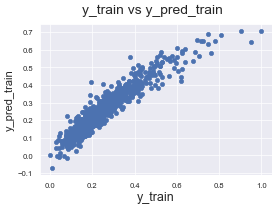

In [545]:
# Plotting y_test and y_pred to understand the spread for ridge regression.
fig = plt.figure(dpi=50)
plt.scatter(y_train ,y_pred_train)
fig.suptitle('y_train vs y_pred_train', fontsize=20)              # Plot heading 
plt.xlabel('y_train', fontsize=18)                          # X-label
plt.ylabel('y_pred_train', fontsize=16)  
plt.show()

In [546]:
res = y_train-y_pred_train

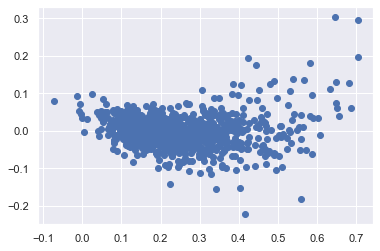

In [547]:
plt.scatter(y_pred_train,res)

plt.show()

Text(0.5, 0, 'Errors')

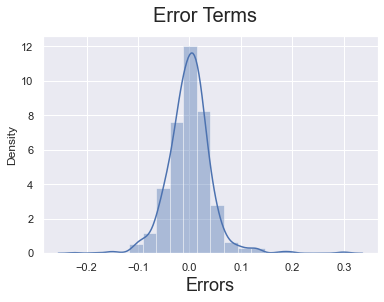

In [548]:
# Plotting the histogram of the error terms
fig = plt.figure()
sns.distplot((y_train - y_pred_train), bins = 20)
fig.suptitle('Error Terms', fontsize = 20)                   
plt.xlabel('Errors', fontsize = 18)   

From the above figure the error terms are normally distributed.

# Ridge and Lasso Regression

Let's now try predicting SalePrices, a dataset used in simple linear regression, to perform ridge and lasso regression.

# Ridge Regression

In [118]:

# list of alphas to tune - if value too high it will lead to underfitting, if it is too low, 
# it will not handle the overfitting
params = {'alpha': [ 0.001, 0.01, 0.05, 0.1, 
 0.2, 0.3, 0.4, 0.5, 0.6, 0.7, 0.8, 0.9, 1.0, 2.0, 3.0, 
 4.0, 5.0, 6.0, 7.0, 8.0, 9.0, 10.0, 20, 50, 100, 500, 1000 ]}

ridge = Ridge()

# cross validation
folds = 5
model_cv = GridSearchCV(estimator = ridge, 
                        param_grid = params, 
                        scoring= 'neg_mean_absolute_error',  
                        cv = folds, 
                        return_train_score=True,
                        verbose = 1)            
model_cv.fit(X_train_lm, y_train) 


Fitting 5 folds for each of 27 candidates, totalling 135 fits


GridSearchCV(cv=5, estimator=Ridge(),
             param_grid={'alpha': [0.001, 0.01, 0.05, 0.1, 0.2, 0.3, 0.4, 0.5,
                                   0.6, 0.7, 0.8, 0.9, 1.0, 2.0, 3.0, 4.0, 5.0,
                                   6.0, 7.0, 8.0, 9.0, 10.0, 20, 50, 100, 500,
                                   1000]},
             return_train_score=True, scoring='neg_mean_absolute_error',
             verbose=1)

In [119]:
# Printing the best hyperparameter alpha
print(model_cv.best_params_)

{'alpha': 1.0}


In [120]:
#Fitting Ridge model for alpha = 1.0 and printing coefficients which have been penalised
alpha = 1.0
ridge = Ridge(alpha=alpha)

ridge.fit(X_train_lm, y_train)
print(ridge.coef_)

[ 0.         -0.05186502  0.05692152  0.15838618  0.04858678  0.05079125
 -0.06124238  0.12599527  0.28378564 -0.02625572  0.09757946  0.07813109
  0.07060709  0.04780068  0.05504749  0.02636911  0.0306786   0.04157404
  0.04544446  0.07362357  0.06817839  0.03013375  0.03578702 -0.04627378
  0.04924658  0.02501816]


In [121]:
# Lets calculate some metrics such as R2 score, RSS and RMSE
y_pred_train = ridge.predict(X_train_lm)
y_pred_test = ridge.predict(X_test_new)

metric2 = []
r2_train_lr = r2_score(y_train, y_pred_train)
print(r2_train_lr)
metric2.append(r2_train_lr)

r2_test_lr = r2_score(y_test, y_pred_test)
print(r2_test_lr)
metric2.append(r2_test_lr)

rss1_lr = np.sum(np.square(y_train - y_pred_train))
print(rss1_lr)
metric2.append(rss1_lr)

rss2_lr = np.sum(np.square(y_test - y_pred_test))
print(rss2_lr)
metric2.append(rss2_lr)

mse_train_lr = mean_squared_error(y_train, y_pred_train)
print(mse_train_lr)
metric2.append(mse_train_lr**0.5)

mse_test_lr = mean_squared_error(y_test, y_pred_test)
print(mse_test_lr)
metric2.append(mse_test_lr**0.5)

0.88830376080301
0.8530618225911465
1.858620400813463
1.3343712549772604
0.0018512155386588276
0.0030959889906664972


In [553]:
y_pred_test = ridge.predict(X_test_new)


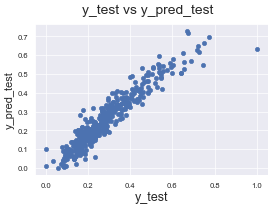

In [554]:
# Plotting y_test and y_pred to understand the spread for ridge regression.
fig = plt.figure(dpi=50)
plt.scatter(y_test ,y_pred_test)
fig.suptitle('y_test vs y_pred_test', fontsize=20)              # Plot heading 
plt.xlabel('y_test', fontsize=18)                          # X-label
plt.ylabel('y_pred_test', fontsize=16)  
plt.show()

In [555]:
res = y_test-y_pred_test

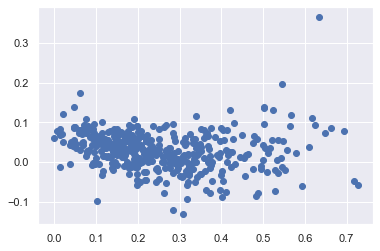

In [556]:
plt.scatter(y_pred_test,res)

plt.show()

Text(0.5, 0, 'Errors')

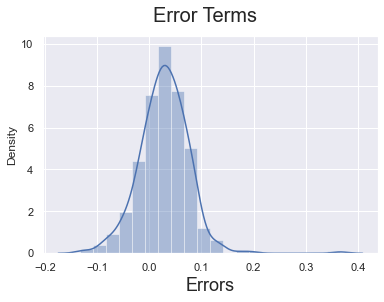

In [557]:
# Plotting the histogram of the error terms
fig = plt.figure()
sns.distplot((y_test - y_pred_test), bins = 20)
fig.suptitle('Error Terms', fontsize = 20)                   
plt.xlabel('Errors', fontsize = 18)   

From the above figure the error terms are normally distributed.

# Lasso

In [131]:
lasso = Lasso()
params = {'alpha': [ 0.0001,0.001, 0.01, 0.05, 0.1, 
 0.2, 0.3, 0.4, 0.5, 0.6, 0.7, 0.8, 0.9, 1.0, 2.0, 3.0, 
 4.0, 5.0, 6.0, 7.0, 8.0, 9.0, 10.0, 20, 50, 100, 500, 1000 ]}


# cross validation
model_cv = GridSearchCV(estimator = lasso, 
                        param_grid = params, 
                        scoring= 'neg_mean_absolute_error', 
                        cv = folds, 
                        return_train_score=True,
                        verbose = 1)            

model_cv.fit(X_train_lm, y_train) 

Fitting 5 folds for each of 28 candidates, totalling 140 fits


GridSearchCV(cv=5, estimator=Lasso(),
             param_grid={'alpha': [0.0001, 0.001, 0.01, 0.05, 0.1, 0.2, 0.3,
                                   0.4, 0.5, 0.6, 0.7, 0.8, 0.9, 1.0, 2.0, 3.0,
                                   4.0, 5.0, 6.0, 7.0, 8.0, 9.0, 10.0, 20, 50,
                                   100, 500, 1000]},
             return_train_score=True, scoring='neg_mean_absolute_error',
             verbose=1)

In [132]:
# Printing the best hyperparameter alpha
print(model_cv.best_params_)

{'alpha': 0.0001}


The optimum value of alpha is 0.0001

In [134]:
#Fitting Ridge model for alpha = 100 and printing coefficients which have been penalised

alpha = 0.0001
lasso = Lasso(alpha=alpha)
        
lasso.fit(X_train_lm, y_train) 

Lasso(alpha=0.0001)

In [135]:
lasso.coef_

array([ 0.        , -0.0533819 ,  0.0447714 ,  0.16471437,  0.04452274,
        0.04682201, -0.06231022,  0.12992691,  0.30595283, -0.03260923,
        0.09135375,  0.07782878,  0.06130673,  0.04795104,  0.05272284,
        0.02586831,  0.0280045 ,  0.03738786,  0.03876307,  0.07249386,
        0.06346503,  0.02556418,  0.0142644 , -0.02814125,  0.04216306,
        0.02219269])

In [136]:
# Lets calculate some metrics such as R2 score, RSS and RMSE

y_pred_train = lasso.predict(X_train_lm)
y_pred_test = lasso.predict(X_test_new)

metric3 = []
r2_train_lr = r2_score(y_train, y_pred_train)
print(r2_train_lr)
metric3.append(r2_train_lr)

r2_test_lr = r2_score(y_test, y_pred_test)
print(r2_test_lr)
metric3.append(r2_test_lr)

rss1_lr = np.sum(np.square(y_train - y_pred_train))
print(rss1_lr)
metric3.append(rss1_lr)

rss2_lr = np.sum(np.square(y_test - y_pred_test))
print(rss2_lr)
metric3.append(rss2_lr)

mse_train_lr = mean_squared_error(y_train, y_pred_train)
print(mse_train_lr)
metric3.append(mse_train_lr**0.5)

mse_test_lr = mean_squared_error(y_test, y_pred_test)
print(mse_test_lr)
metric3.append(mse_test_lr**0.5)

0.8880248190000324
0.8523219716958768
1.8632619798798755
1.34108997018815
0.001855838625378362
0.0031115776570490718


In [563]:
y_pred_test = lasso.predict(X_test_new)

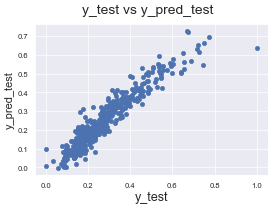

In [564]:
# Plotting y_test and y_pred to understand the spread for ridge regression.
fig = plt.figure(dpi=50)
plt.scatter(y_test ,y_pred_test)
fig.suptitle('y_test vs y_pred_test', fontsize=20)              # Plot heading 
plt.xlabel('y_test', fontsize=18)                          # X-label
plt.ylabel('y_pred_test', fontsize=16)  
plt.show()

In [565]:
res=y_test-y_pred_test

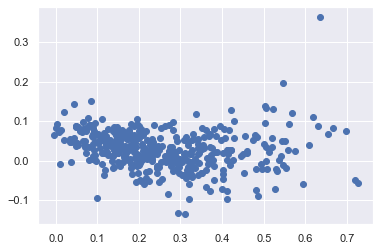

In [566]:
res=plt.scatter(y_pred_test,res)

plt.show()

Text(0.5, 0, 'Errors')

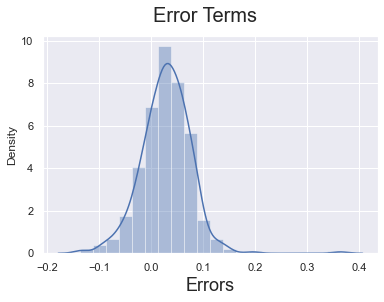

In [567]:
# Plotting the histogram of the error terms
fig = plt.figure()
sns.distplot((y_test - y_pred_test), bins = 20)
fig.suptitle('Error Terms', fontsize = 20)                   
plt.xlabel('Errors', fontsize = 18)   

From the above figure the error terms are normally distributed.

In [137]:
# Creating a table which contain all the metrics

lr_table = {'Metric': ['R2 Score (Train)','R2 Score (Test)','RSS (Train)','RSS (Test)',
                       'MSE (Train)','MSE (Test)'], 
        'Linear Regression': metric
        }

lr_metric = pd.DataFrame(lr_table ,columns = ['Metric', 'Linear Regression'] )

rg_metric = pd.Series(metric2, name = 'Ridge Regression')
ls_metric = pd.Series(metric3, name = 'Lasso Regression')

final_metric = pd.concat([lr_metric, rg_metric, ls_metric], axis = 1)

final_metric

,Metric,Linear Regression,Ridge Regression,Lasso Regression
0,R2 Score (Train),0.888985,0.888304,0.888025
1,R2 Score (Test),0.852977,0.853062,0.852322
2,RSS (Train),1.847285,1.858620,1.863262
3,RSS (Test),1.335145,1.334371,1.341090
4,MSE (Train),0.042894,0.043026,0.043079
5,MSE (Test),0.055658,0.055642,0.055782


From the above Metric the Ridge Regression is showing better than Lasso Regression as R2 Score(Test) is slightly higher,
RSS and MSE is comparatively lower than Lasso.

The R2 Score of Ridge is 0.88 in training set where as 0.85 in test set and the difference is not more than 4.

What we need is lowest total error, i.e., low bias and low variance, such that the model identifies all the patterns and is also able to perform well with unseen data.

So we conclude that our model is robust and generalisable.

## Lets observe the changes in the coefficients after regularization

In [138]:
betas = pd.DataFrame(index=X_train_lm.columns)

In [139]:
betas.rows = X_train_lm.columns

In [140]:
betas['Ridge'] = ridge.coef_
betas['Lasso'] = lasso.coef_

In [141]:
pd.set_option('display.max_rows', None)
betas.head(26)

,Ridge,Lasso
const,0.000000,0.000000
MSSubClass,-0.051865,-0.053382
LotArea,0.056922,0.044771
OverallQual,0.158386,0.164714
OverallCond,0.048587,0.044523
MasVnrArea,0.050791,0.046822
BsmtUnfSF,-0.061242,-0.062310
TotalBsmtSF,0.125995,0.129927
GrLivArea,0.283786,0.305953
BedroomAbvGr,-0.026256,-0.032609


The coefficients of above variables are significant for prediticting SalePrice of House.